1. Import libraries

In [1]:
#Handling data
# - Pandas: Essential for data manipulation and analysis
# - Numpy: Provides support for numerical operations
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

#Data Visualization
# - Matplotlib and seaborn: Popular libraries for static visualization
# - Plotly.express: For creating interactive plots.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Preprocessing
# - MinMaxScaler, StandardScaler: Tools for scaling features
# - train_test_split: To split datasets into training and testing subsets
# - ColumnTransformer and OneHotEncoder: Tools for data preprocessing, especially for handling categorical data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Models: Various classifiers from scikit-learn, XGBoost, LightGBM, and CatBoost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

#Tensorflow: Tools for building, training, and evaluating deep learning models
import tensorflow as tf
from keras.layers import Dense,Input,Dropout
from keras.models import Model
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model
from keras.metrics import FalseNegatives
from keras.metrics import FalsePositives
from keras.metrics import TruePositives
from keras.metrics import TrueNegatives
from keras.metrics import Recall
from keras.metrics import Precision
from keras.metrics import BinaryAccuracy

#Factorial Analysis: Factor Analysis of Mixed Data (FAMD), from the prince library.
from prince import FAMD

#Statistic: Quantile–Quantile plots (Q-Q plot) and shapiro: Used for assessing normality of data
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

#Time: To handle time-related tasks, useful for timing how long training or other tasks take
import time

#Metrics: Various metrics to evaluate the performance of machine learning models
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, log_loss
from sklearn.metrics import cohen_kappa_score, average_precision_score, precision_recall_curve, roc_curve

#Type: Type hinting support for better code readability and minor benefits in some IDEs or tools that support static type checking
from typing import Dict
from typing import List

#Warnings: To handle or suppress warnings that might be generated during code execution
import warnings
warnings.filterwarnings('ignore')

2. Load data

In [2]:
data = pd.read_excel('../Classification_EDA_Voting_Stacked_NNA_PlotMetrics/Training.xlsb')
data.head()

,ID,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,MARKER
0,1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,Woman,33.750000,Mogilev region,132,NE employee,Secondary education (plus special education),Married,2 Two,property,No,Works,Yes,Yes,No,Yes,No,0
1,2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,Woman,33.250000,Minsk region,6,NE employee,Secondary education (plus special education),Married,2 Two,otherwise,No,Works,Yes,Yes,Yes,Yes,No,0
2,3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,Woman,38.583333,Vitebsk region,71,NE employee,Secondary education (plus special education),Divorced/widow,1 One,property,No,No couple,No,Yes,No,Yes,No,0
3,4,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,Woman,61.250000,Minsk region,48,Pensioner,Secondary education (plus special education),Divorced/widow,0 Zero,property,No,No couple,Yes,Yes,Few,Yes,No,0
4,5,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,Woman,48.583333,Brest region,48,NE employee,Secondary education (plus special education),Divorced/widow,0 Zero,property,No,No couple,Yes,No,No,No,No,0


In [3]:
data_test = pd.read_excel('../Classification_EDA_Voting_Stacked_NNA_PlotMetrics/Test.xlsb')
data_test.head()

,ID,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,MARKER
0,1,0.085400,0.085400,29.72,267.28,0.763657,0.763657,13,3.49,Woman,23.500000,Minsk region,13,NE employee,Secondary education (plus special education),Single/unmarried,1 One,property,No,No couple,Yes,Yes,No,No,No,0
1,2,0.223218,0.111609,0.00,1097.90,1.996182,0.998091,13,3.49,Woman,34.916667,Vitebsk region,48,NE employee,Secondary education (plus special education),Married,3 Three,property,No,Works,Yes,Yes,No,No,No,1
2,3,0.048400,0.048400,0.00,399.90,0.499875,0.499875,13,1.99,Man,41.750000,Vitebsk region,180,Head/Deputy head (division),Secondary education (plus special education),Married,0 Zero,property,No,Unemployed,Yes,Yes,No,No,No,0
3,4,0.039560,0.039560,19.59,176.93,0.353860,0.353860,13,3.49,Man,33.083333,Gomel region,12,NE employee,Secondary education (plus special education),Married,1 One,property,No,Unemployed,Yes,Yes,Yes,Yes,No,0
4,5,0.231017,0.173263,0.00,1239.56,2.065933,1.549450,13,3.49,Woman,44.833333,Minsk region,48,Head/Deputy head (division),Higher education (one or more),Married,1 One,property,No,Works,Yes,Yes,No,No,No,0


In [4]:
#Print size of training and test dataset
print(f'the data set have {data.shape[0]} rows and {data.shape[1]} columns')
print(f'the data set have {data_test.shape[0]} rows and {data_test.shape[1]} columns')

the data set have 89734 rows and 26 columns
the data set have 38405 rows and 26 columns


In [5]:
print('=='*25)
print(' '*12, 'Data Information')
print('=='*25)
print(data.info())

             Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89734 entries, 0 to 89733
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      89734 non-null  int64  
 1   A       89734 non-null  float64
 2   B       89734 non-null  float64
 3   C       89734 non-null  float64
 4   D       89734 non-null  float64
 5   E       89734 non-null  float64
 6   F       89734 non-null  float64
 7   G       89734 non-null  int64  
 8   H       89734 non-null  float64
 9   I       89734 non-null  object 
 10  J       89734 non-null  float64
 11  K       89734 non-null  object 
 12  L       89734 non-null  int64  
 13  M       89734 non-null  object 
 14  N       89734 non-null  object 
 15  O       89734 non-null  object 
 16  P       89734 non-null  object 
 17  Q       89734 non-null  object 
 18  R       89734 non-null  object 
 19  S       89734 non-null  object 
 20  T       89734 non-null  object 
 21  U    

In [6]:
print('=='*25)
print(' '*12, 'Data Information')
print('=='*25)
print(data_test.info())

             Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38405 entries, 0 to 38404
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      38405 non-null  int64  
 1   A       38405 non-null  float64
 2   B       38405 non-null  float64
 3   C       38405 non-null  float64
 4   D       38405 non-null  float64
 5   E       38405 non-null  float64
 6   F       38405 non-null  float64
 7   G       38405 non-null  int64  
 8   H       38405 non-null  float64
 9   I       38405 non-null  object 
 10  J       38405 non-null  float64
 11  K       38405 non-null  object 
 12  L       38405 non-null  int64  
 13  M       38405 non-null  object 
 14  N       38405 non-null  object 
 15  O       38405 non-null  object 
 16  P       38405 non-null  object 
 17  Q       38405 non-null  object 
 18  R       38405 non-null  object 
 19  S       38405 non-null  object 
 20  T       38405 non-null  object 
 21  U    

In [7]:
print('=='*30)
print(' '*12, 'Data Information')
print('=='*30)
print(data.info())

             Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89734 entries, 0 to 89733
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      89734 non-null  int64  
 1   A       89734 non-null  float64
 2   B       89734 non-null  float64
 3   C       89734 non-null  float64
 4   D       89734 non-null  float64
 5   E       89734 non-null  float64
 6   F       89734 non-null  float64
 7   G       89734 non-null  int64  
 8   H       89734 non-null  float64
 9   I       89734 non-null  object 
 10  J       89734 non-null  float64
 11  K       89734 non-null  object 
 12  L       89734 non-null  int64  
 13  M       89734 non-null  object 
 14  N       89734 non-null  object 
 15  O       89734 non-null  object 
 16  P       89734 non-null  object 
 17  Q       89734 non-null  object 
 18  R       89734 non-null  object 
 19  S       89734 non-null  object 
 20  T       89734 non-null  object 
 21  U    

3. Exploratory Data Analysis (EDA)

In [8]:
#Data test null values check
data_test.isnull().sum()

ID        0
A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
J         0
K         0
L         0
M         0
N         0
O         0
P         0
Q         0
R         0
S         0
T         0
U         0
V         0
W         0
X         0
MARKER    0
dtype: int64

In [9]:
#Data train null values check
data.isnull().sum()

ID        0
A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
J         0
K         0
L         0
M         0
N         0
O         0
P         0
Q         0
R         0
S         0
T         0
U         0
V         0
W         0
X         0
MARKER    0
dtype: int64

In [10]:
data.describe()

,ID,A,B,C,D,E,F,G,H,J,L,MARKER
count,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000
mean,44867.500000,0.167863,0.113511,85.801266,548.507954,1.011455,0.683640,7.854358,0.510274,41.140778,103.719092,0.003811
std,25904.118865,0.153851,0.105340,105.366771,448.686233,0.910583,0.622047,4.754588,0.928146,11.129976,100.458022,0.061618
min,1.000000,0.000002,0.000001,0.000000,49.980000,0.000016,0.000012,2.000000,0.000000,21.000000,0.000000,0.000000
25%,22434.250000,0.065843,0.042922,20.570000,227.030000,0.405983,0.263775,4.000000,0.000000,32.083333,29.000000,0.000000
50%,44867.500000,0.119133,0.079733,50.020000,408.735000,0.749403,0.499387,5.000000,0.000000,40.000000,69.000000,0.000000
75%,67300.750000,0.220000,0.146990,108.930000,746.710000,1.333367,0.899260,13.000000,0.010000,50.000000,144.000000,0.000000
max,89734.000000,7.067250,0.874025,2682.420000,4999.000000,35.337000,10.352991,24.000000,3.500000,64.916667,540.000000,1.000000


In [11]:
data_test.describe()

,ID,A,B,C,D,E,F,G,H,J,L,MARKER
count,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000,38405.000000
mean,19203.000000,0.165496,0.112346,85.477585,550.510148,1.007690,0.681848,7.915167,0.516702,41.035251,103.881135,0.003802
std,11086.712881,0.149073,0.104078,105.556498,454.407026,0.913395,0.623232,4.802276,0.934162,11.156148,100.065184,0.061541
min,1.000000,0.000003,0.000002,0.000000,49.990000,0.000026,0.000015,2.000000,0.000000,21.000000,0.000000,0.000000
25%,9602.000000,0.065271,0.042506,19.990000,227.030000,0.404571,0.261371,4.000000,0.000000,31.916667,30.000000,0.000000
50%,19203.000000,0.118125,0.078769,50.010000,408.410000,0.748571,0.498553,5.000000,0.000000,39.833333,72.000000,0.000000
75%,28804.000000,0.217429,0.146146,107.990000,743.990000,1.324711,0.890391,13.000000,0.010000,49.916667,144.000000,0.000000
max,38405.000000,3.799800,0.864022,2459.400000,4993.600000,29.997500,9.542313,24.000000,3.500000,64.916667,545.000000,1.000000


In [12]:
#Remove column ID
data.drop('ID',axis=1, inplace = True)
data_test.drop('ID',axis=1, inplace = True)

In [13]:
#Check duplicate rows
print(f'There are {data.duplicated().sum()} duplicate rows')
print(f'There are {data_test.duplicated().sum()} duplicate rows')

There are 0 duplicate rows
There are 0 duplicate rows


In [14]:
#Remove the blank spaces on either side of each variable name
data.columns = data.columns.str.strip()
data_test.columns = data_test.columns.str.strip()

In [15]:
categorical_graph = data.select_dtypes(include=['object','category']).columns.to_list()
numerical_graph = data.select_dtypes(include=['int','float']).columns.to_list()

print('=='*50)
print(f'Total Categorical Variables = {len(categorical_graph)}')
print('Categorical source variables => Unique values => number of unique values')
print('=='*50)
for categoria in categorical_graph:
    print('*',categoria,'==>',data[categoria].unique(),'==>',data[categoria].nunique(),'\n')

print('=='*30)
print(f'Total Numerical Variables = {len(numerical_graph)}')
print(f'Numerical source variable')
print('=='*30)
for numerica in numerical_graph:
  print('*',numerica)

Total Categorical Variables = 14
Categorical source variables => Unique values => number of unique values
* I ==> ['Woman' 'Man'] ==> 2 

* K ==> ['Mogilev region' 'Minsk region' 'Vitebsk region' 'Brest region' 'Minsk'
 'Grodno region' 'Gomel region'] ==> 7 

* M ==> ['NE employee' 'Pensioner' 'Head/Deputy head (organiz.)'
 'Head/Deputy head (division)' 'Enterpreneur'] ==> 5 

* N ==> ['Secondary education (plus special education)'
 'Higher education (one or more)' 'Incomplete higher education'
 'Primary or lower secondary education'] ==> 4 

* O ==> ['Married' 'Divorced/widow' 'Single/unmarried' 'Cohabitation'] ==> 4 

* P ==> ['2 Two' '1 One' '0 Zero' '3 Three' 'More than 3'] ==> 5 

* Q ==> ['property' 'otherwise' 'rent/hire'] ==> 3 

* R ==> ['No' 'Yes'] ==> 2 

* S ==> ['Works' 'No couple' 'Pensioner' 'Unemployed' 'Student'] ==> 5 

* T ==> ['Yes' 'No'] ==> 2 



* U ==> ['Yes' 'No'] ==> 2 

* V ==> ['No' 'Yes' 'Few'] ==> 3 

* W ==> ['Yes' 'No'] ==> 2 

* X ==> ['No' 'Yes'] ==> 2 

Total Numerical Variables = 11
Numerical source variable
* A
* B
* C
* D
* E
* F
* G
* H
* J
* L
* MARKER


In [16]:
#Columns name change
new_names_columns = {'I':'Sex', 'K':'Region', 'M':'Job_title', 'N':'Education', 'O':'Marriage',
                     'P':'Children', 'Q':'Property', 'S':'Employment_status'}
data.rename(columns=new_names_columns, inplace = True)
data_test.rename(columns = new_names_columns, inplace = True)

In [17]:
#Convert the target variable to a categorical data type since that is its origin
data['MARKER'] = data['MARKER'].astype('object')
data_test['MARKER'] = data_test['MARKER'].astype('object')

In [18]:
#Select our categorical and numeric source variables since we have made some modifications
categorical_graph = data.select_dtypes(include=['object','category']).columns.to_list()
numerical_graph = data.select_dtypes(include=['int','float']).columns.to_list()

print('=='*50)
print(f'Total Categorical Variables = {len(categorical_graph)}')
print('Variables of categorical origin => Unique values => number of unique values')
print('=='*50)
for categoria in categorical_graph:
    print('*',categoria,'==>',data[categoria].unique(),'==>',data[categoria].nunique(),'\n')

print('=='*30)
print(f'Total Numerical Variables = {len(numerical_graph)}')
print(f'Variables of numerical origin')
print('=='*30)
for numerica in numerical_graph:
  print('*',numerica)

Total Categorical Variables = 15
Variables of categorical origin => Unique values => number of unique values
* Sex ==> ['Woman' 'Man'] ==> 2 



* Region ==> ['Mogilev region' 'Minsk region' 'Vitebsk region' 'Brest region' 'Minsk'
 'Grodno region' 'Gomel region'] ==> 7 

* Job_title ==> ['NE employee' 'Pensioner' 'Head/Deputy head (organiz.)'
 'Head/Deputy head (division)' 'Enterpreneur'] ==> 5 

* Education ==> ['Secondary education (plus special education)'
 'Higher education (one or more)' 'Incomplete higher education'
 'Primary or lower secondary education'] ==> 4 

* Marriage ==> ['Married' 'Divorced/widow' 'Single/unmarried' 'Cohabitation'] ==> 4 

* Children ==> ['2 Two' '1 One' '0 Zero' '3 Three' 'More than 3'] ==> 5 

* Property ==> ['property' 'otherwise' 'rent/hire'] ==> 3 

* R ==> ['No' 'Yes'] ==> 2 

* Employment_status ==> ['Works' 'No couple' 'Pensioner' 'Unemployed' 'Student'] ==> 5 

* T ==> ['Yes' 'No'] ==> 2 

* U ==> ['Yes' 'No'] ==> 2 

* V ==> ['No' 'Yes' 'Few'] ==> 3 

* W ==> ['Yes' 'No'] ==> 2 

* X ==> ['No' 'Yes'] ==> 2 

* MARKER ==> [0 1] ==> 2 

Total Numerical Variables = 10
Variables of numerica

In [19]:
#Convert the numeric variables from type 'int' to type 'float'
for i in numerical_graph:
  data[i] = data[i].astype(float)
  data_test[i] = data_test[i].astype(float)

In [20]:
#Verify the information after changed and converted about our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89734 entries, 0 to 89733
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  89734 non-null  float64
 1   B                  89734 non-null  float64
 2   C                  89734 non-null  float64
 3   D                  89734 non-null  float64
 4   E                  89734 non-null  float64
 5   F                  89734 non-null  float64
 6   G                  89734 non-null  float64
 7   H                  89734 non-null  float64
 8   Sex                89734 non-null  object 
 9   J                  89734 non-null  float64
 10  Region             89734 non-null  object 
 11  L                  89734 non-null  float64
 12  Job_title          89734 non-null  object 
 13  Education          89734 non-null  object 
 14  Marriage           89734 non-null  object 
 15  Children           89734 non-null  object 
 16  Property           897

In [21]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38405 entries, 0 to 38404
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  38405 non-null  float64
 1   B                  38405 non-null  float64
 2   C                  38405 non-null  float64
 3   D                  38405 non-null  float64
 4   E                  38405 non-null  float64
 5   F                  38405 non-null  float64
 6   G                  38405 non-null  float64
 7   H                  38405 non-null  float64
 8   Sex                38405 non-null  object 
 9   J                  38405 non-null  float64
 10  Region             38405 non-null  object 
 11  L                  38405 non-null  float64
 12  Job_title          38405 non-null  object 
 13  Education          38405 non-null  object 
 14  Marriage           38405 non-null  object 
 15  Children           38405 non-null  object 
 16  Property           384

3.1 Univariate 

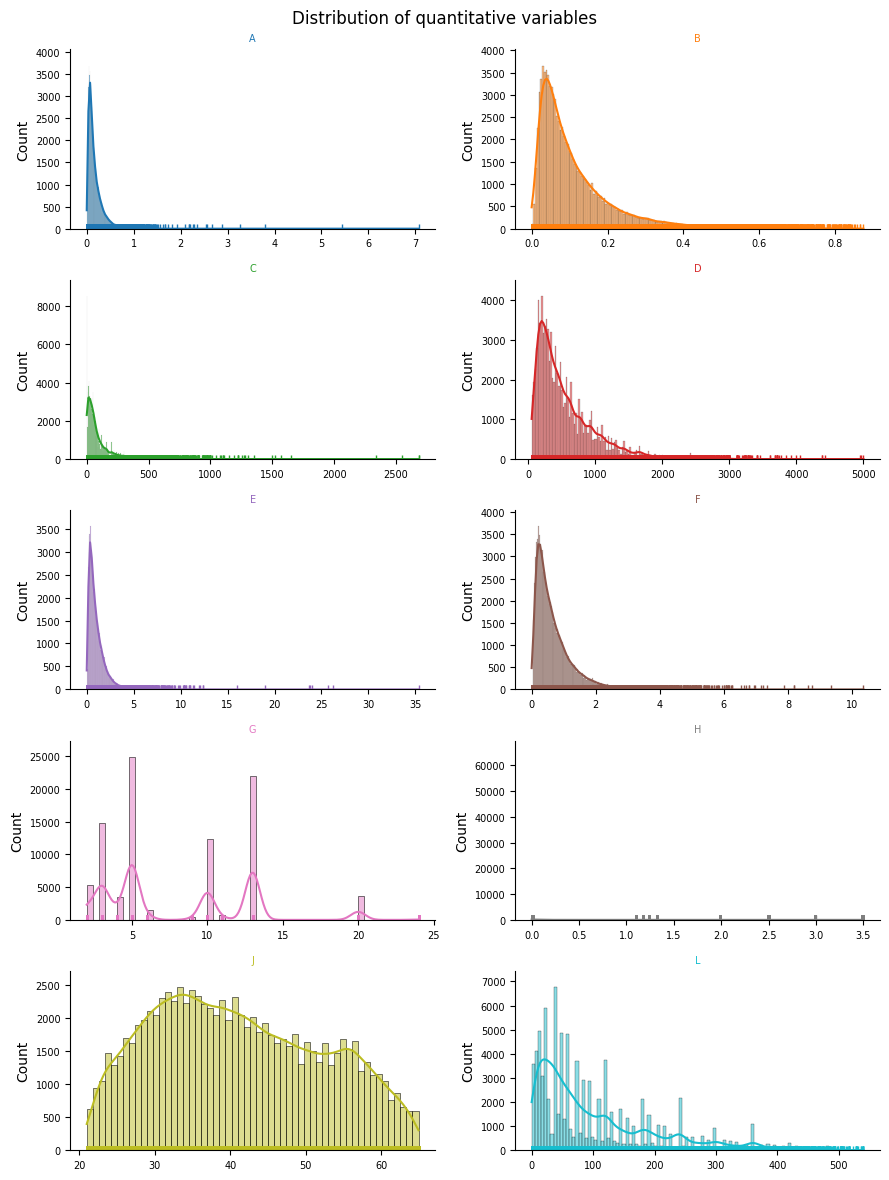

In [22]:
#Visualize the distribution of our quantitative source variables for column A, B, C, D, F, G, H, J, L (Training data)
fig,ax = plt.subplots(5,2,figsize=(9,12))
ax = ax.flat
for i,col in enumerate(numerical_graph):
  sns.histplot(data,
               x = col,
               stat = 'count',
               kde=True,
               color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth':1.5},
               ax = ax[i])
  sns.rugplot(data,
              x = col,
              color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
              alpha = 1.0,
              ax = ax[i])
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].tick_params(labelsize=7)
  ax[i].set_title(col, fontsize = 7, fontweight = 'regular', color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"]),
  ax[i].set_xlabel('')

fig.suptitle('Distribution of quantitative variables',fontsize=12, fontweight='regular',color='black')
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show() 

In [23]:
#Define our function to check if our numerical data is normally distributed for column A, B, C, D, F, G, H, J, L (Training data)
def shapiro_test(col:str):
  stat,p_value = shapiro(data[col])
  if p_value < 0.05:
    return f'{col} => No Normal Ditribution'
  else:
    return f'{col} => Normal Distribution'

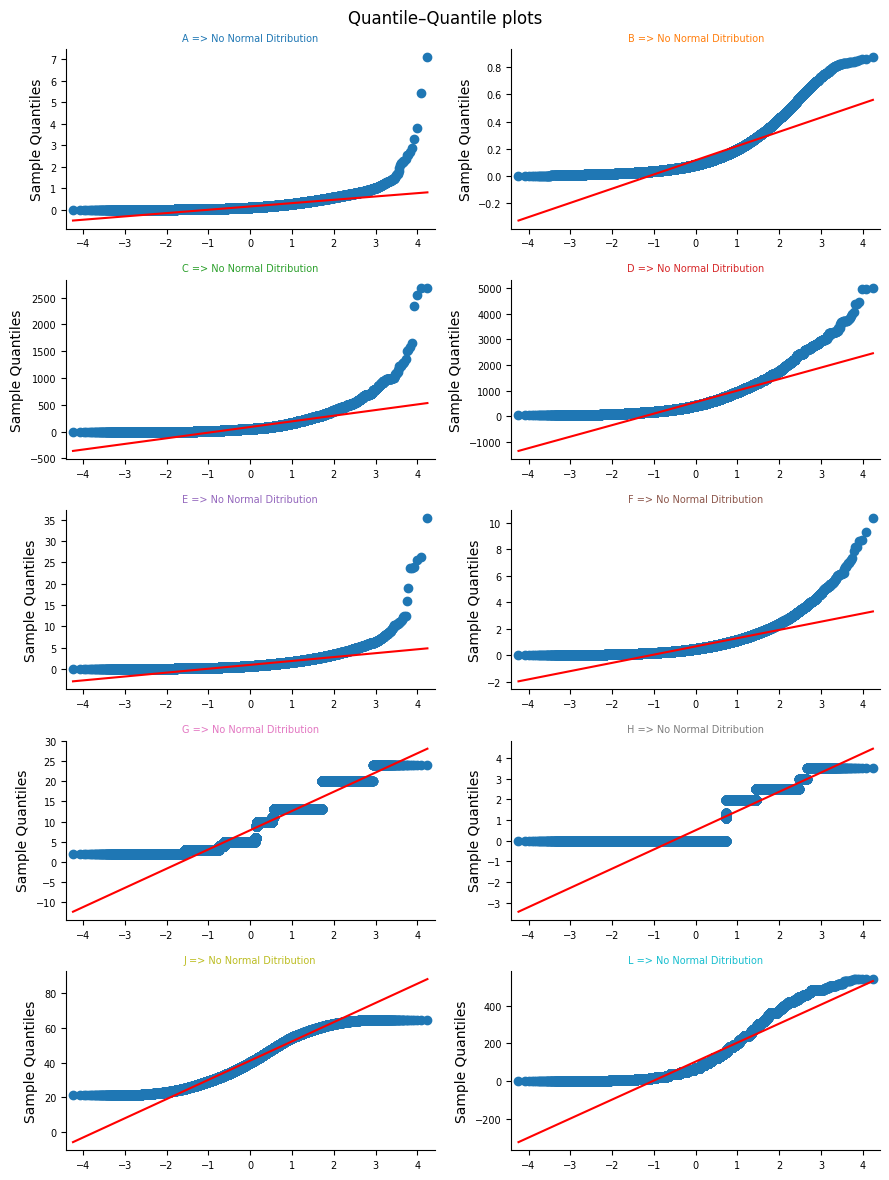

In [24]:
#Create our Quantile–Quantile plots for the quantitative variables for column A, B, C, D, F, G, H, J, L (Training data)
fig,ax = plt.subplots(5,2,figsize=(9,12))
ax = ax.flat
for i,col in enumerate(numerical_graph):
  qqplot(data[col], line = 's', ax = ax[i])
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].tick_params(labelsize=7)
  ax[i].set_title(shapiro_test(col), fontsize = 7, fontweight = 'regular', color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"])
  ax[i].set_xlabel('')

fig.suptitle('Quantile–Quantile plots',fontsize=12, fontweight='regular',color='black')
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

In [25]:
def univariate_categorical_plot(data:pd.DataFrame,
                                name_col:str,
                                orientation:str='h',
                                pie:bool=False)->None:
  
    """
    Creates a pie chart or bar chart based on the specified column of the given DataFrame.

    Args:
      data (pd.DataFrame): The dataset to be visualized.
      orientation (str): Specifies the orientation of the bar chart. Accepts 'h' for horizontal and 'v' for vertical. Ignored if pie chart is plotted.
      name_col (str): Name of the column in the DataFrame to be visualized.
      pie (bool, optional): If True, plots a pie chart. If False (default), plots a bar chart based on the orientation provided.

    Returns:
      A plot object (if applicable).

    Raises:
      ValueError: If the provided orientation is not 'h' or 'v'.
      KeyError: If the provided column name does not exist in the DataFrame.
    """

    fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
    df1 = data[name_col].value_counts().to_frame()
    k = list(str(i) for i in data[name_col].value_counts().to_frame().index)
    
    #Bar chart
    if orientation == 'h':
      rects1 = ax[0].barh(k, df1.iloc[:,0], linewidth = 0, edgecolor = 'black', color = '#cbbeb5')
      ax[0].set_title('',fontsize=14,fontweight='regular',color='blue')
      ax[0].tick_params(labelsize=8, size=7)
      ax[0].spines['top'].set_visible(False)
      ax[0].spines['left'].set_visible(False)
      ax[0].spines['bottom'].set_visible(True)
      ax[0].spines['right'].set_visible(False)

      def autolabel(rects):
      
        for rect in rects:
            width = rect.get_width()
            height = rect.get_height()
            ax[0].annotate('{}'.format(width),
                        xy=(width, rect.get_y() + rect.get_height() / 2),
                        xytext=(3,0),
                        textcoords="offset points",
                        ha='left', va='center', size = 7, weight = 'regular')
      
      autolabel(rects1)

    else: 
      rects1 = ax[0].bar(k, df1.iloc[:,0], linewidth = 0, edgecolor = 'black', color = '#00FF00')
      ax[0].set_title('',fontsize=14,fontweight='regular',color='blue')
      ax[0].tick_params(labelsize=8, size=7)
      ax[0].spines['top'].set_visible(False)
      ax[0].spines['right'].set_visible(False)

      def autolabel(rects):
      
        for rect in rects:
            
            height = rect.get_height()
            ax[0].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom', size = 7, weight = 'regular')
      
      autolabel(rects1)

    if pie == False:
      fig.delaxes(ax[1])
      ax[0].set_title(f'Categorical Variable: {name_col}', color = 'black', fontsize = 12, fontweight = 'regular')
      fig.show()

    else:
      #Pie chart
      def func(pct, allvalues):
          
          absolute = int(pct/100.*np.sum(allvalues))
          return "{:.1f}%".format(pct)

      counts = data[name_col].value_counts()
      
      labels = counts.index.tolist()
      values = counts.values.tolist()
     
      cmap = plt.get_cmap('tab20')

      
      colors = cmap(np.arange(len(labels)))

      ax[1].pie(x = values, labels = labels, autopct = lambda pct: func(pct,counts.values),
            startangle=45, colors = colors, wedgeprops={'linewidth':0,'edgecolor':'black'},
            textprops = {'color':'black', 'weight':'regular','fontsize':10})
      ax[1].set_title('', fontsize = 14, fontweight = 'regular', color = 'blue')
      ax[1].axis('equal')

      fig.suptitle(f'Categorical Variable: {name_col}', color = 'black', fontsize = 12, fontweight = 'regular')
      fig.subplots_adjust(top=0.9)
      fig.tight_layout()
      fig.show()

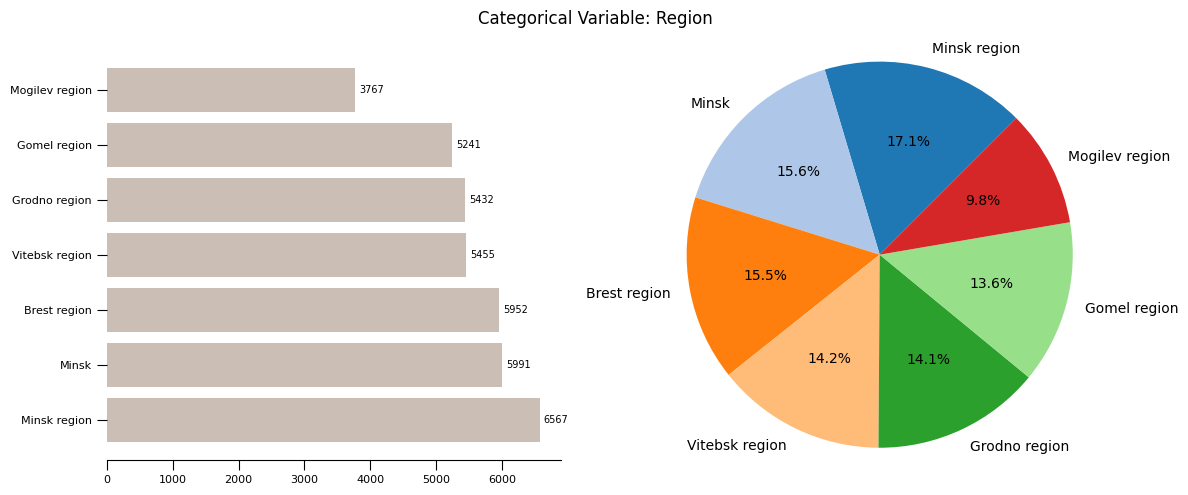

In [26]:
univariate_categorical_plot(data_test, categorical_graph[1], 'h',True) #Test data

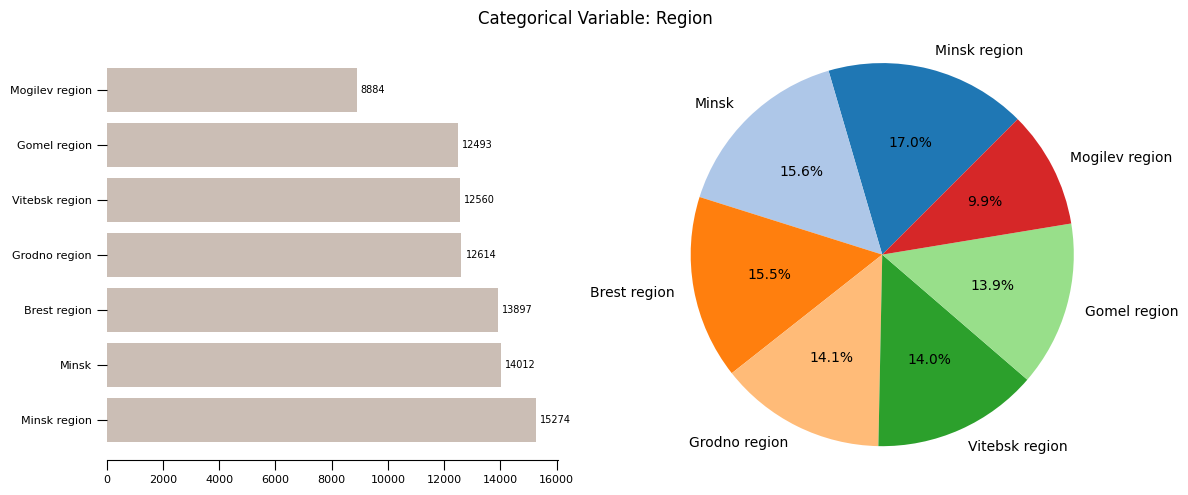

In [27]:
univariate_categorical_plot(data, categorical_graph[1], 'h',True) #Training data

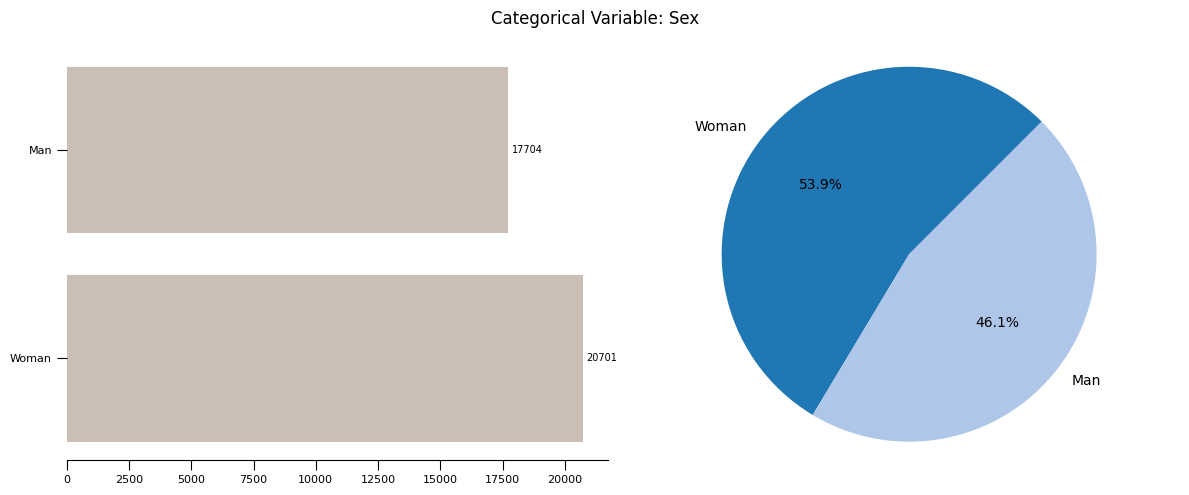

In [28]:
univariate_categorical_plot(data_test, categorical_graph[0], 'h',True)

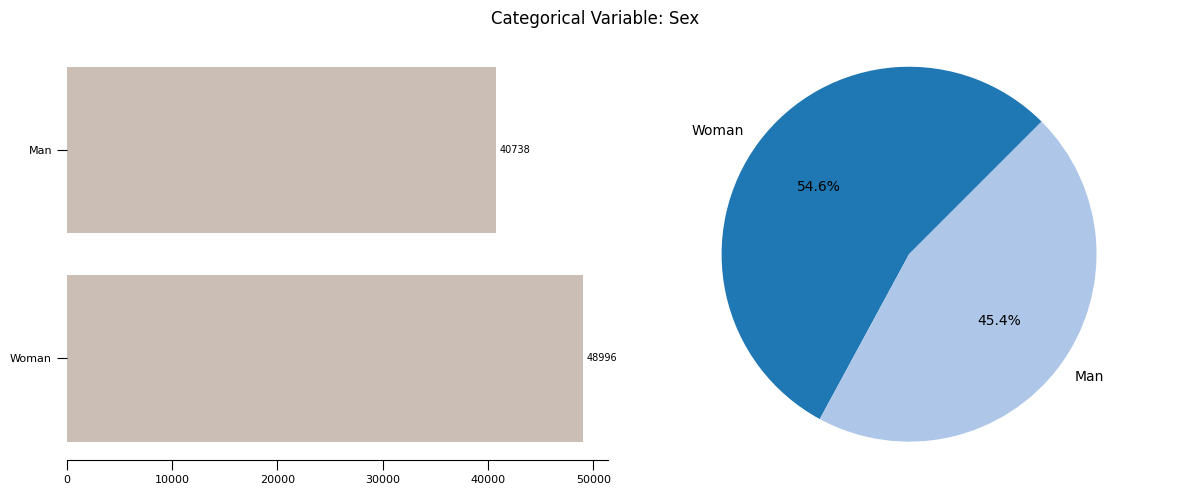

In [29]:
univariate_categorical_plot(data, categorical_graph[0], 'h',True)

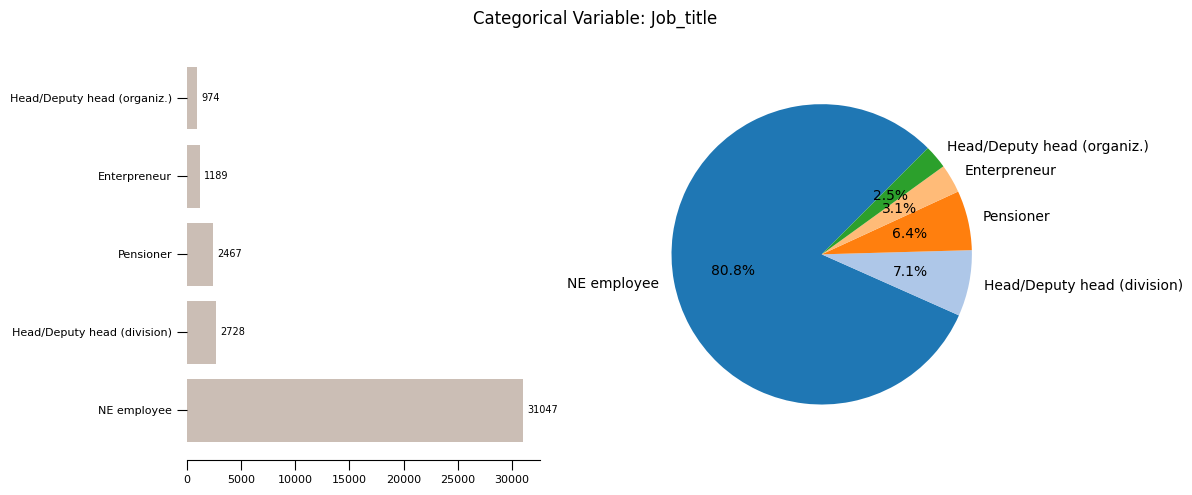

In [30]:
univariate_categorical_plot(data_test, categorical_graph[2], 'h',True)

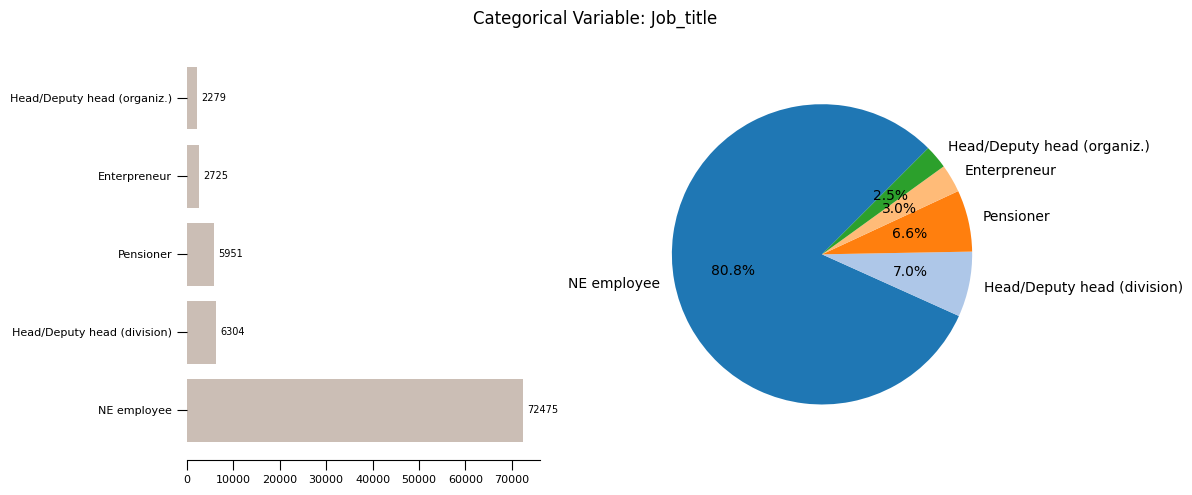

In [31]:
univariate_categorical_plot(data, categorical_graph[2], 'h',True)

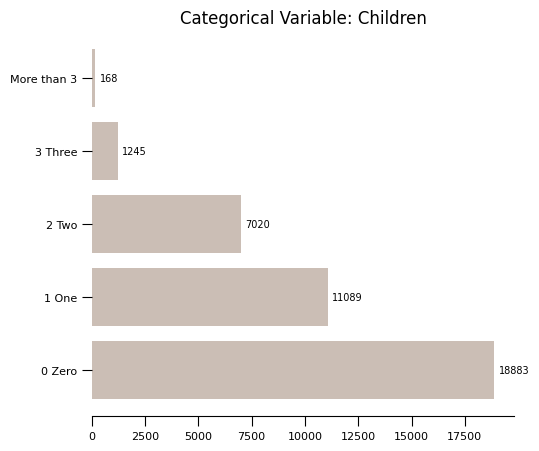

In [32]:
univariate_categorical_plot(data_test, categorical_graph[5], 'h')

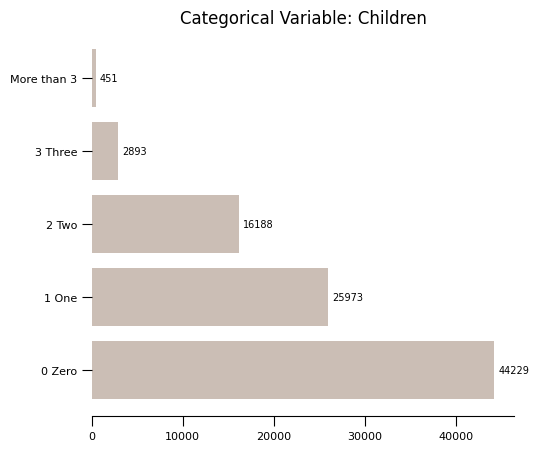

In [33]:
univariate_categorical_plot(data, categorical_graph[5], 'h')

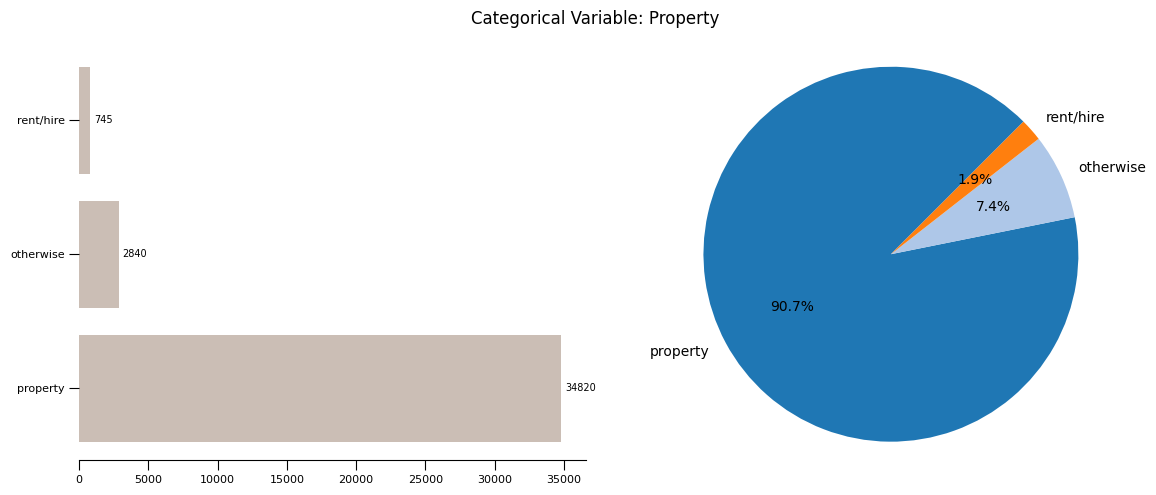

In [34]:
univariate_categorical_plot(data_test, categorical_graph[6], 'h',True)

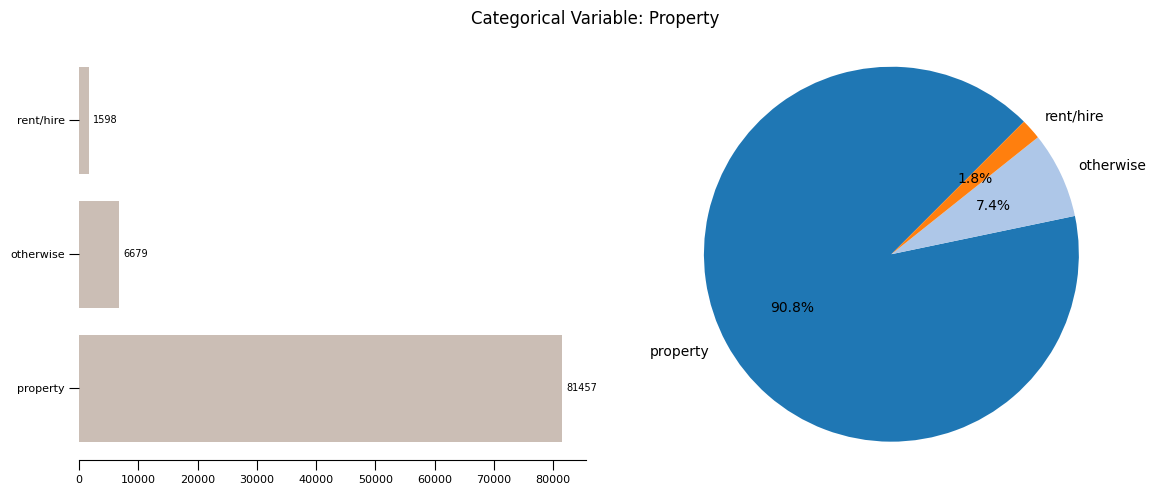

In [35]:
univariate_categorical_plot(data, categorical_graph[6], 'h',True)

3.2 Bivariate Analysis

In [36]:
def bivariate_categorical_plot(data:pd.DataFrame, var_1:str, var_2:str)->None:
  df = pd.crosstab(data[var_1],data[var_2])
  
  """
    Generates a bivariate graph based on two categorical variables from a given DataFrame.

    Args:
      data (pd.DataFrame): The dataset containing the variables to be visualized.
      var_1 (str): Name of the categorical variable to be plotted on the x-axis.
      var_2 (str): Name of the categorical variable to be plotted on the y-axis.

    Returns:
      A bivariate plot (if applicable).

    Raises:
      KeyError: If either of the provided column names does not exist in the DataFrame.
  """
  
  n = len(df.index)
  x = np.arange(n)


  width = 0.3

  fig,ax = plt.subplots(figsize=(12,4))
  for k in range(len(df.columns)):
    
    rects1 = ax.bar(x-width, df.iloc[:,0], width=width, linewidth=0, edgecolor='black',color='#cbbeb5')

    
    rects2 = ax.bar(x, df.iloc[:,1], width=width, linewidth=0, edgecolor='black', color = '#769293')


  ax.set_title(f'{var_1} vs {var_2}',fontsize=12, fontweight='regular', color = 'black')
  ax.set_ylabel('Count',fontsize=10, fontweight='regular')
  ax.set_xticks(x-0.13)
  ax.set_xticklabels(df.index, fontsize=7, fontweight='regular')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.legend(df.columns, loc='best')

  def autolabel(rects):
  
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 7, weight = 'regular')
 
  autolabel(rects1)
  autolabel(rects2)
  fig.subplots_adjust(top=0.9)
  fig.tight_layout()
  fig.show()

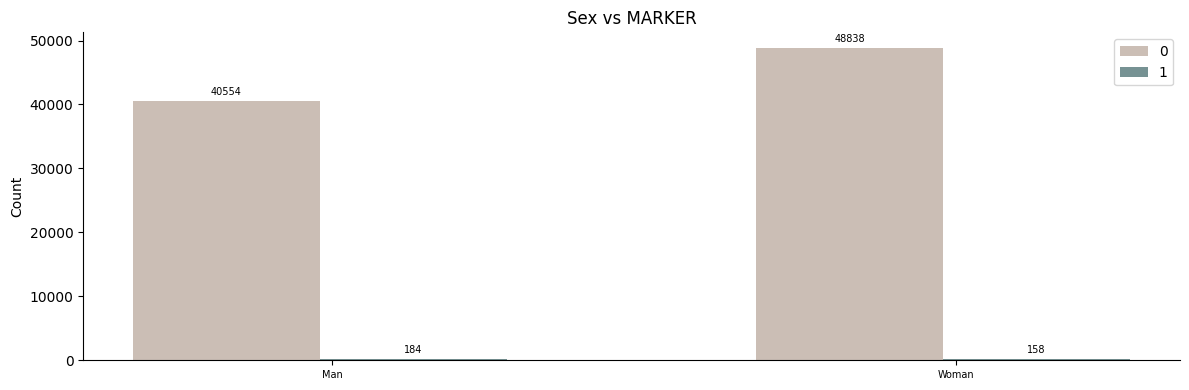

In [37]:
bivariate_categorical_plot(data, categorical_graph[0], categorical_graph[14])

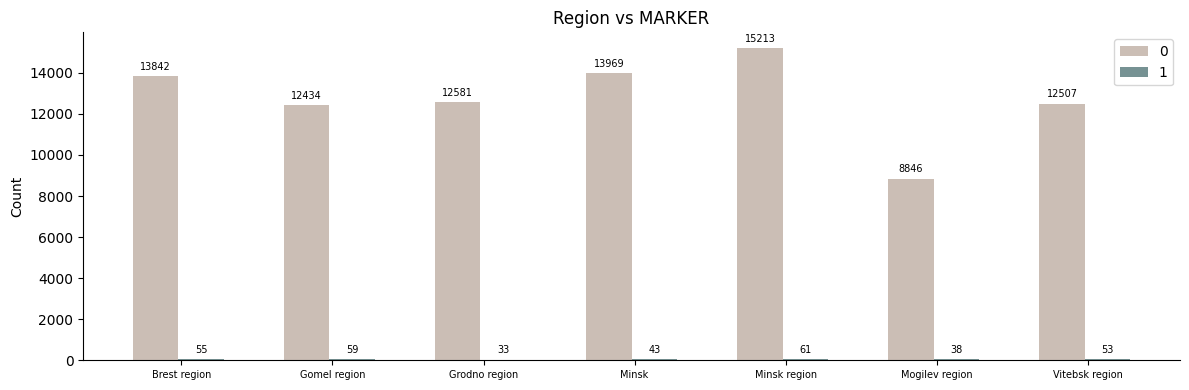

In [38]:
bivariate_categorical_plot(data, categorical_graph[1], categorical_graph[14])

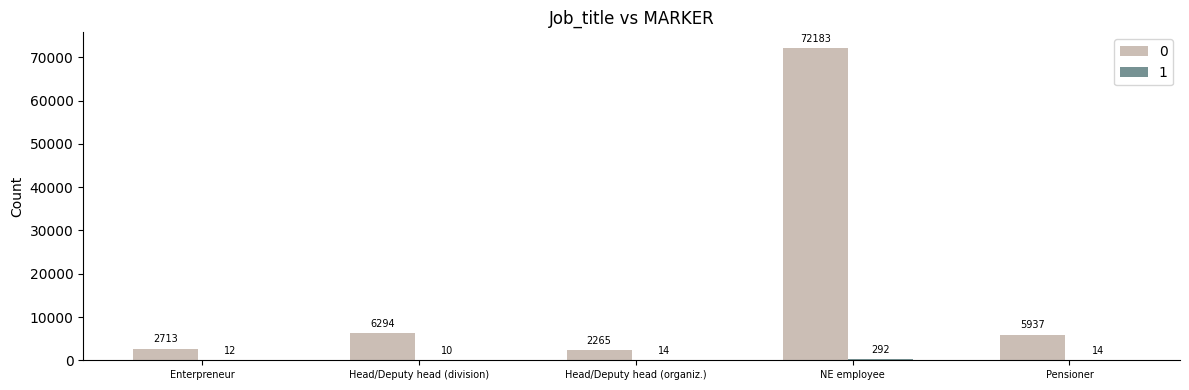

In [39]:
bivariate_categorical_plot(data, categorical_graph[2], categorical_graph[14])

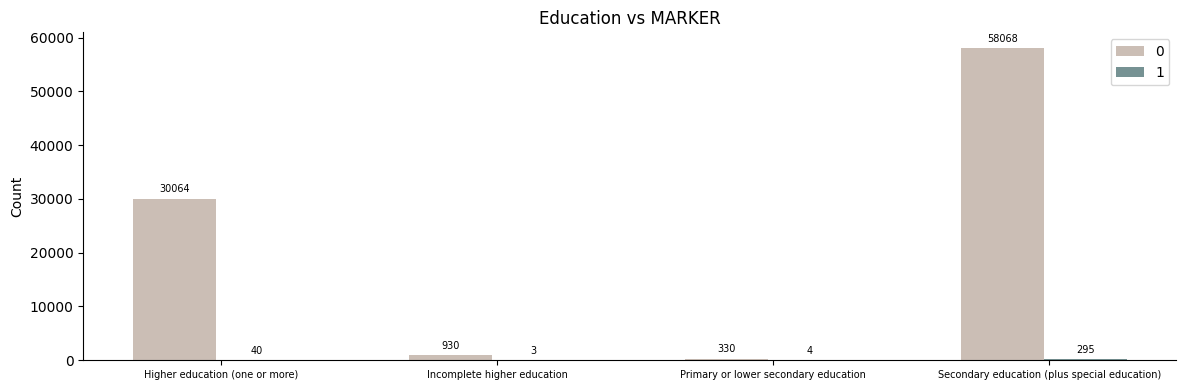

In [40]:
bivariate_categorical_plot(data, categorical_graph[3], categorical_graph[14])

In [41]:
def bivariate_num_cat_plot(data:pd.DataFrame, var_nums:list, var_cat:str)->None:
  
  """
      Generates plots for a list of numerical variables against categorical variables.

    Args:
      data (pd.DataFrame): The dataset containing the variables to be visualized.
      var_nums (List[str]): List of column names representing numerical variables.
      var_cat (List[str]): List of column names representing categorical variables.
      type (str): Type of the plot, either 'boxplot' or 'kde'.

    Returns:
      Visualization based on the given plot type (if applicable).

    Raises:
      KeyError: If any of the provided column names does not exist in the DataFrame.
      ValueError: If the specified plot type is neither 'boxplot' nor 'kde'.
  """

  fig,ax = plt.subplots(5,2,figsize=(20,30))
  ax=ax.flat
  for i,col in enumerate(var_nums):
    sns.boxplot(data, x = var_cat ,  y = var_nums[i], width = 0.5, ax = ax[i])
    ax[i].set_title(f'{var_nums[i]} vs {var_cat}', fontsize=12, fontweight='regular', color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].tick_params('x',rotation=90)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

  fig.suptitle(f'Numerical Variables vs {var_cat}',fontsize=12,fontweight='regular',color='black')
  fig.subplots_adjust(top=0.9)
  fig.tight_layout()
  fig.show()

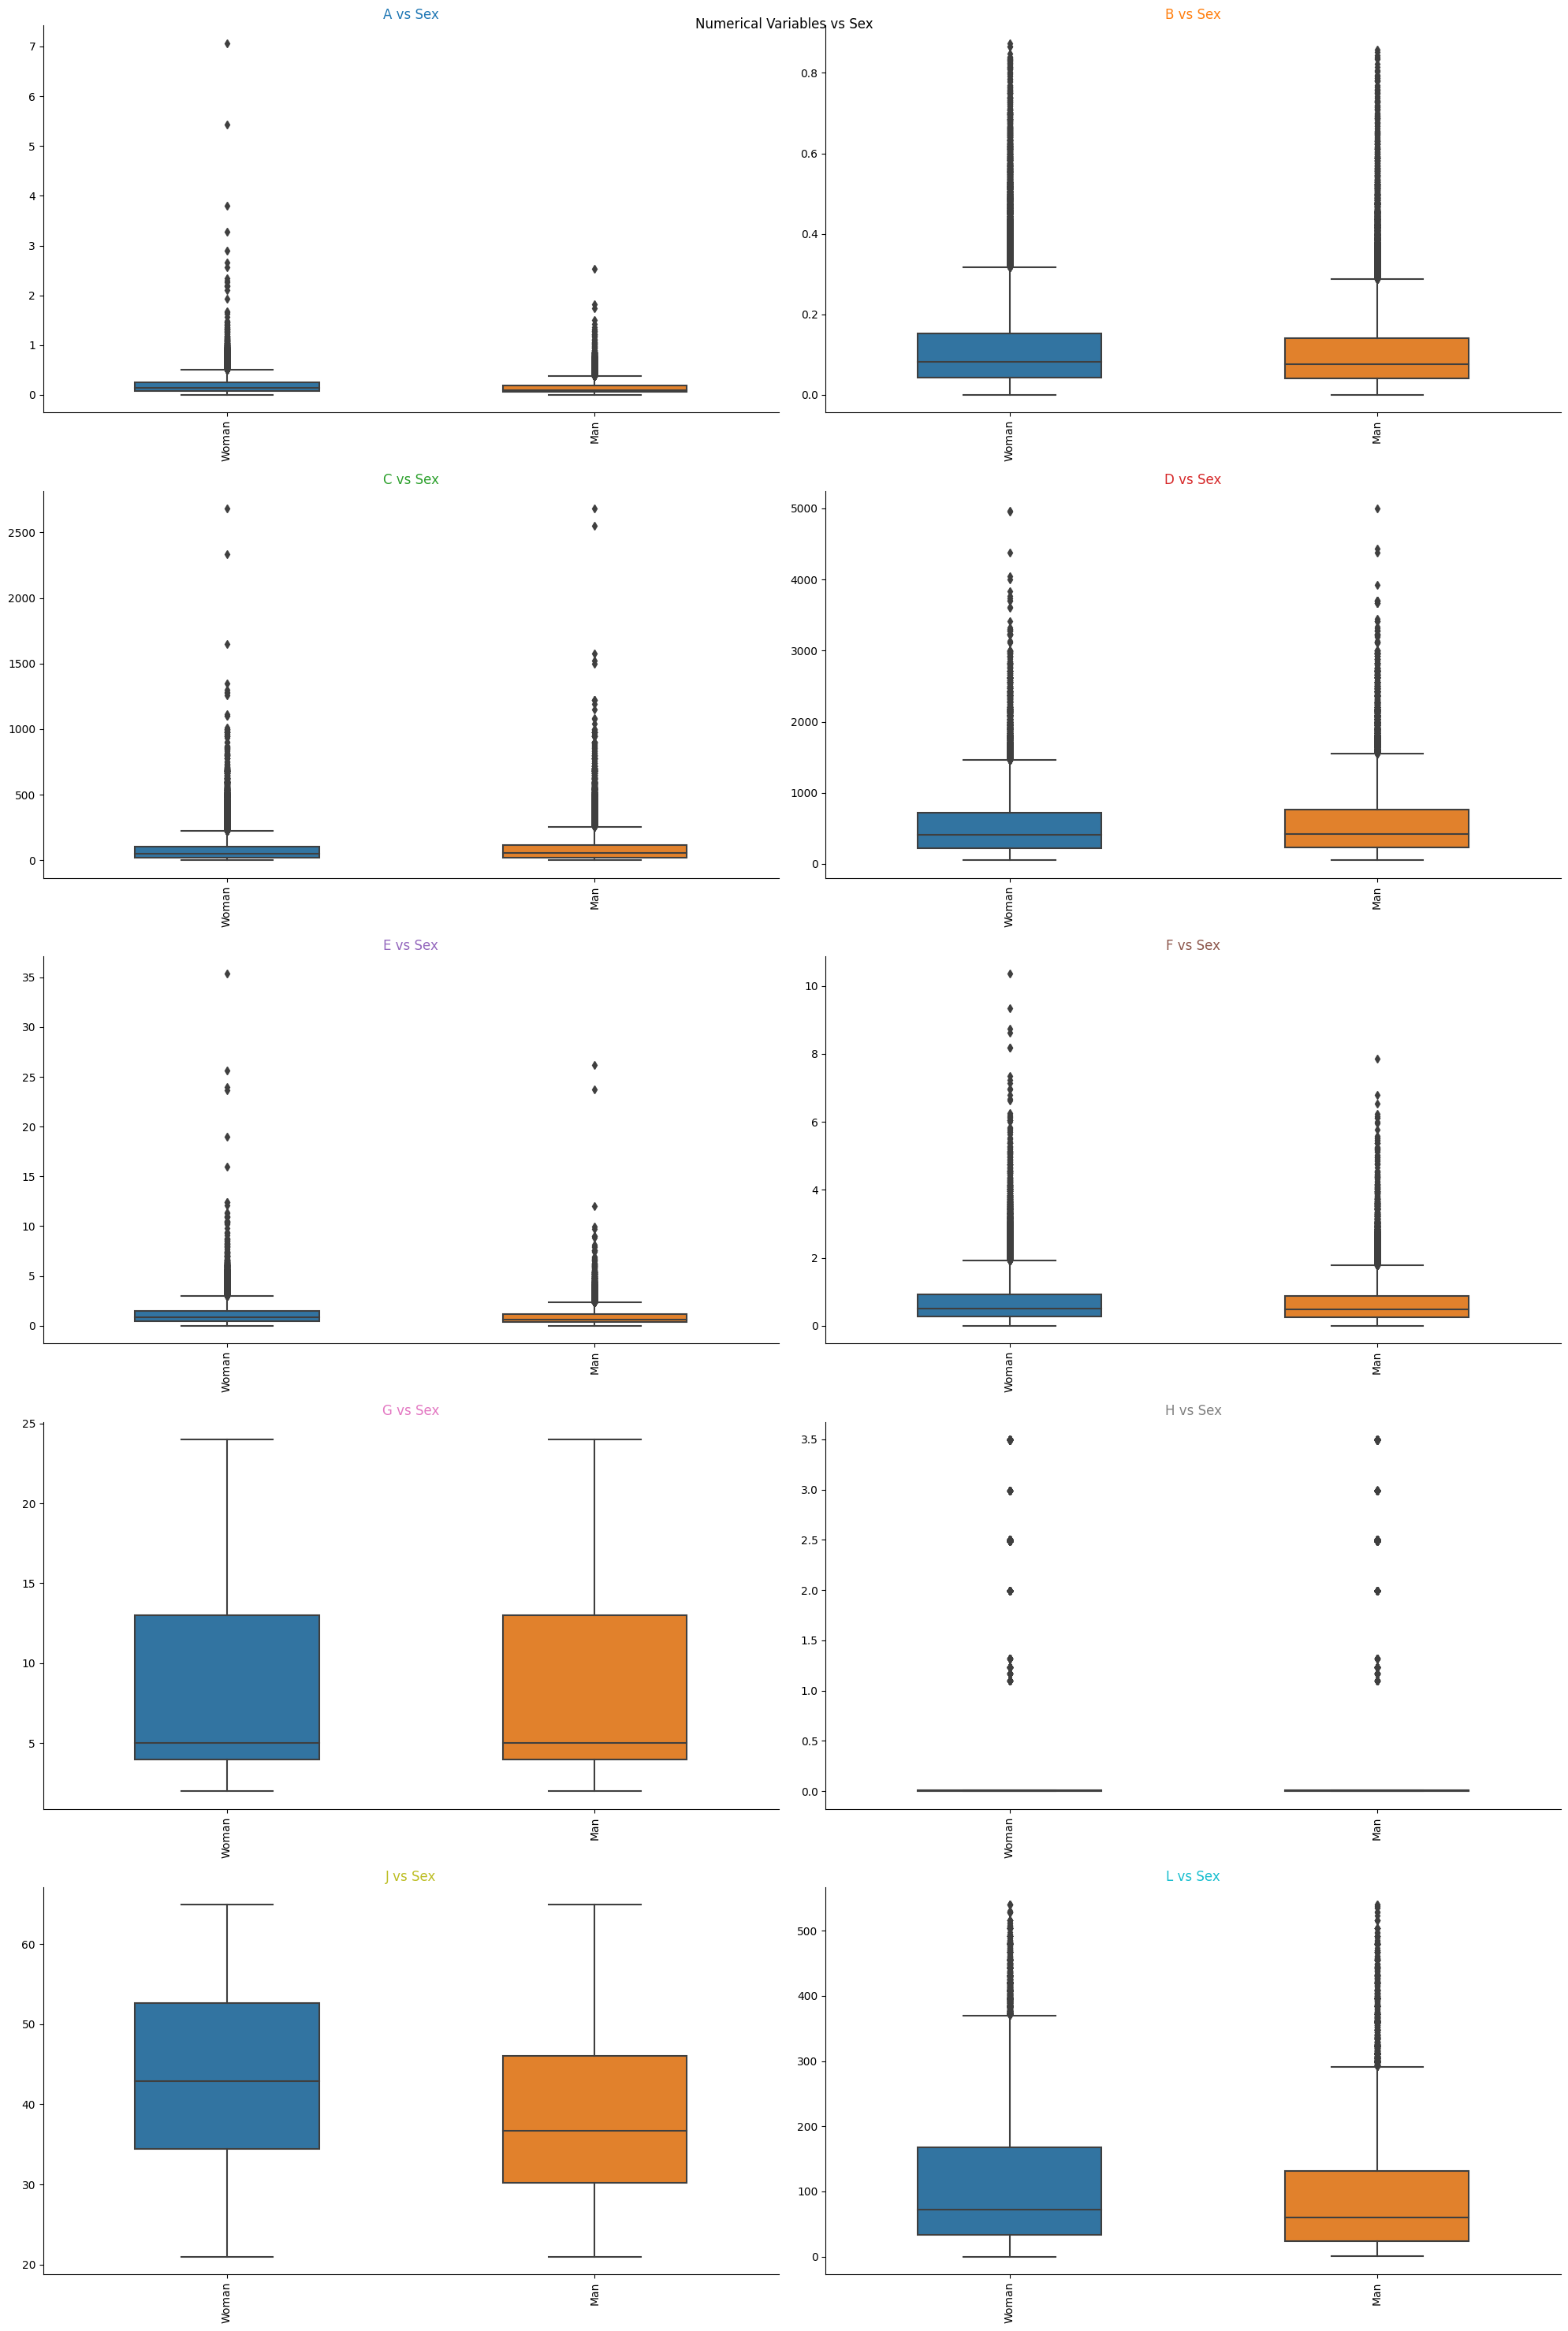

In [42]:
bivariate_num_cat_plot(data, numerical_graph, categorical_graph[0])

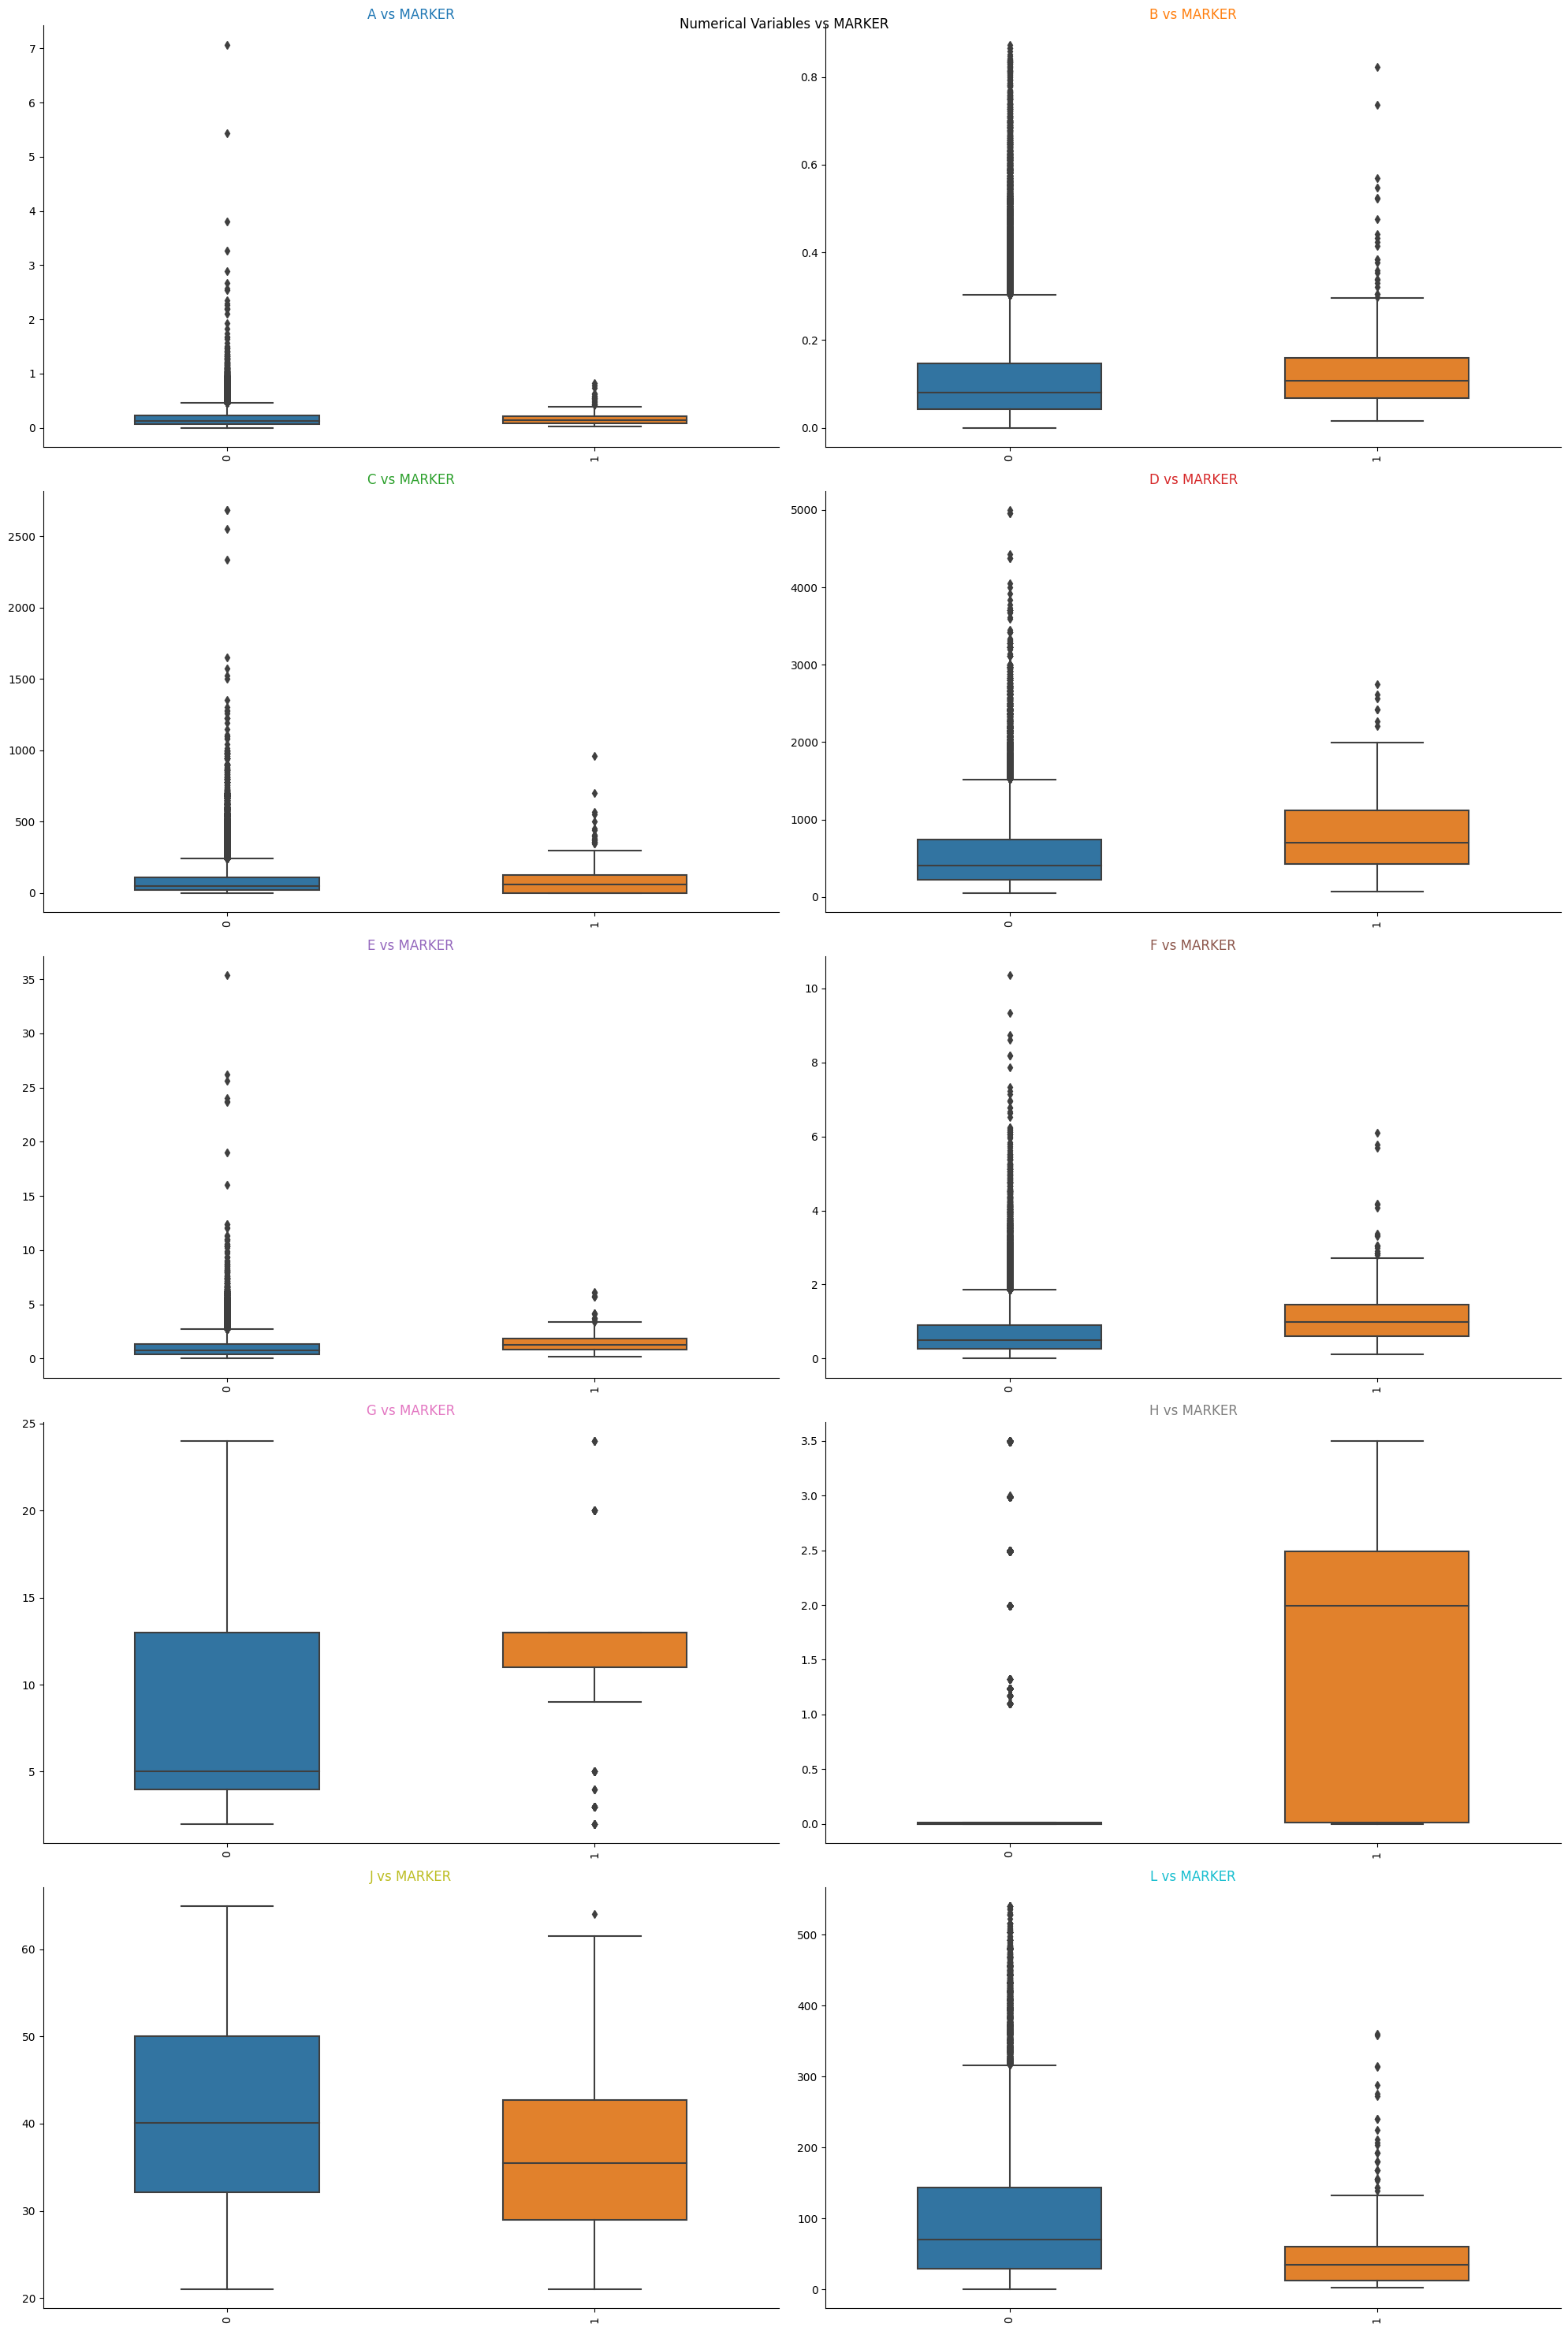

In [43]:
bivariate_num_cat_plot(data, numerical_graph, categorical_graph[14])

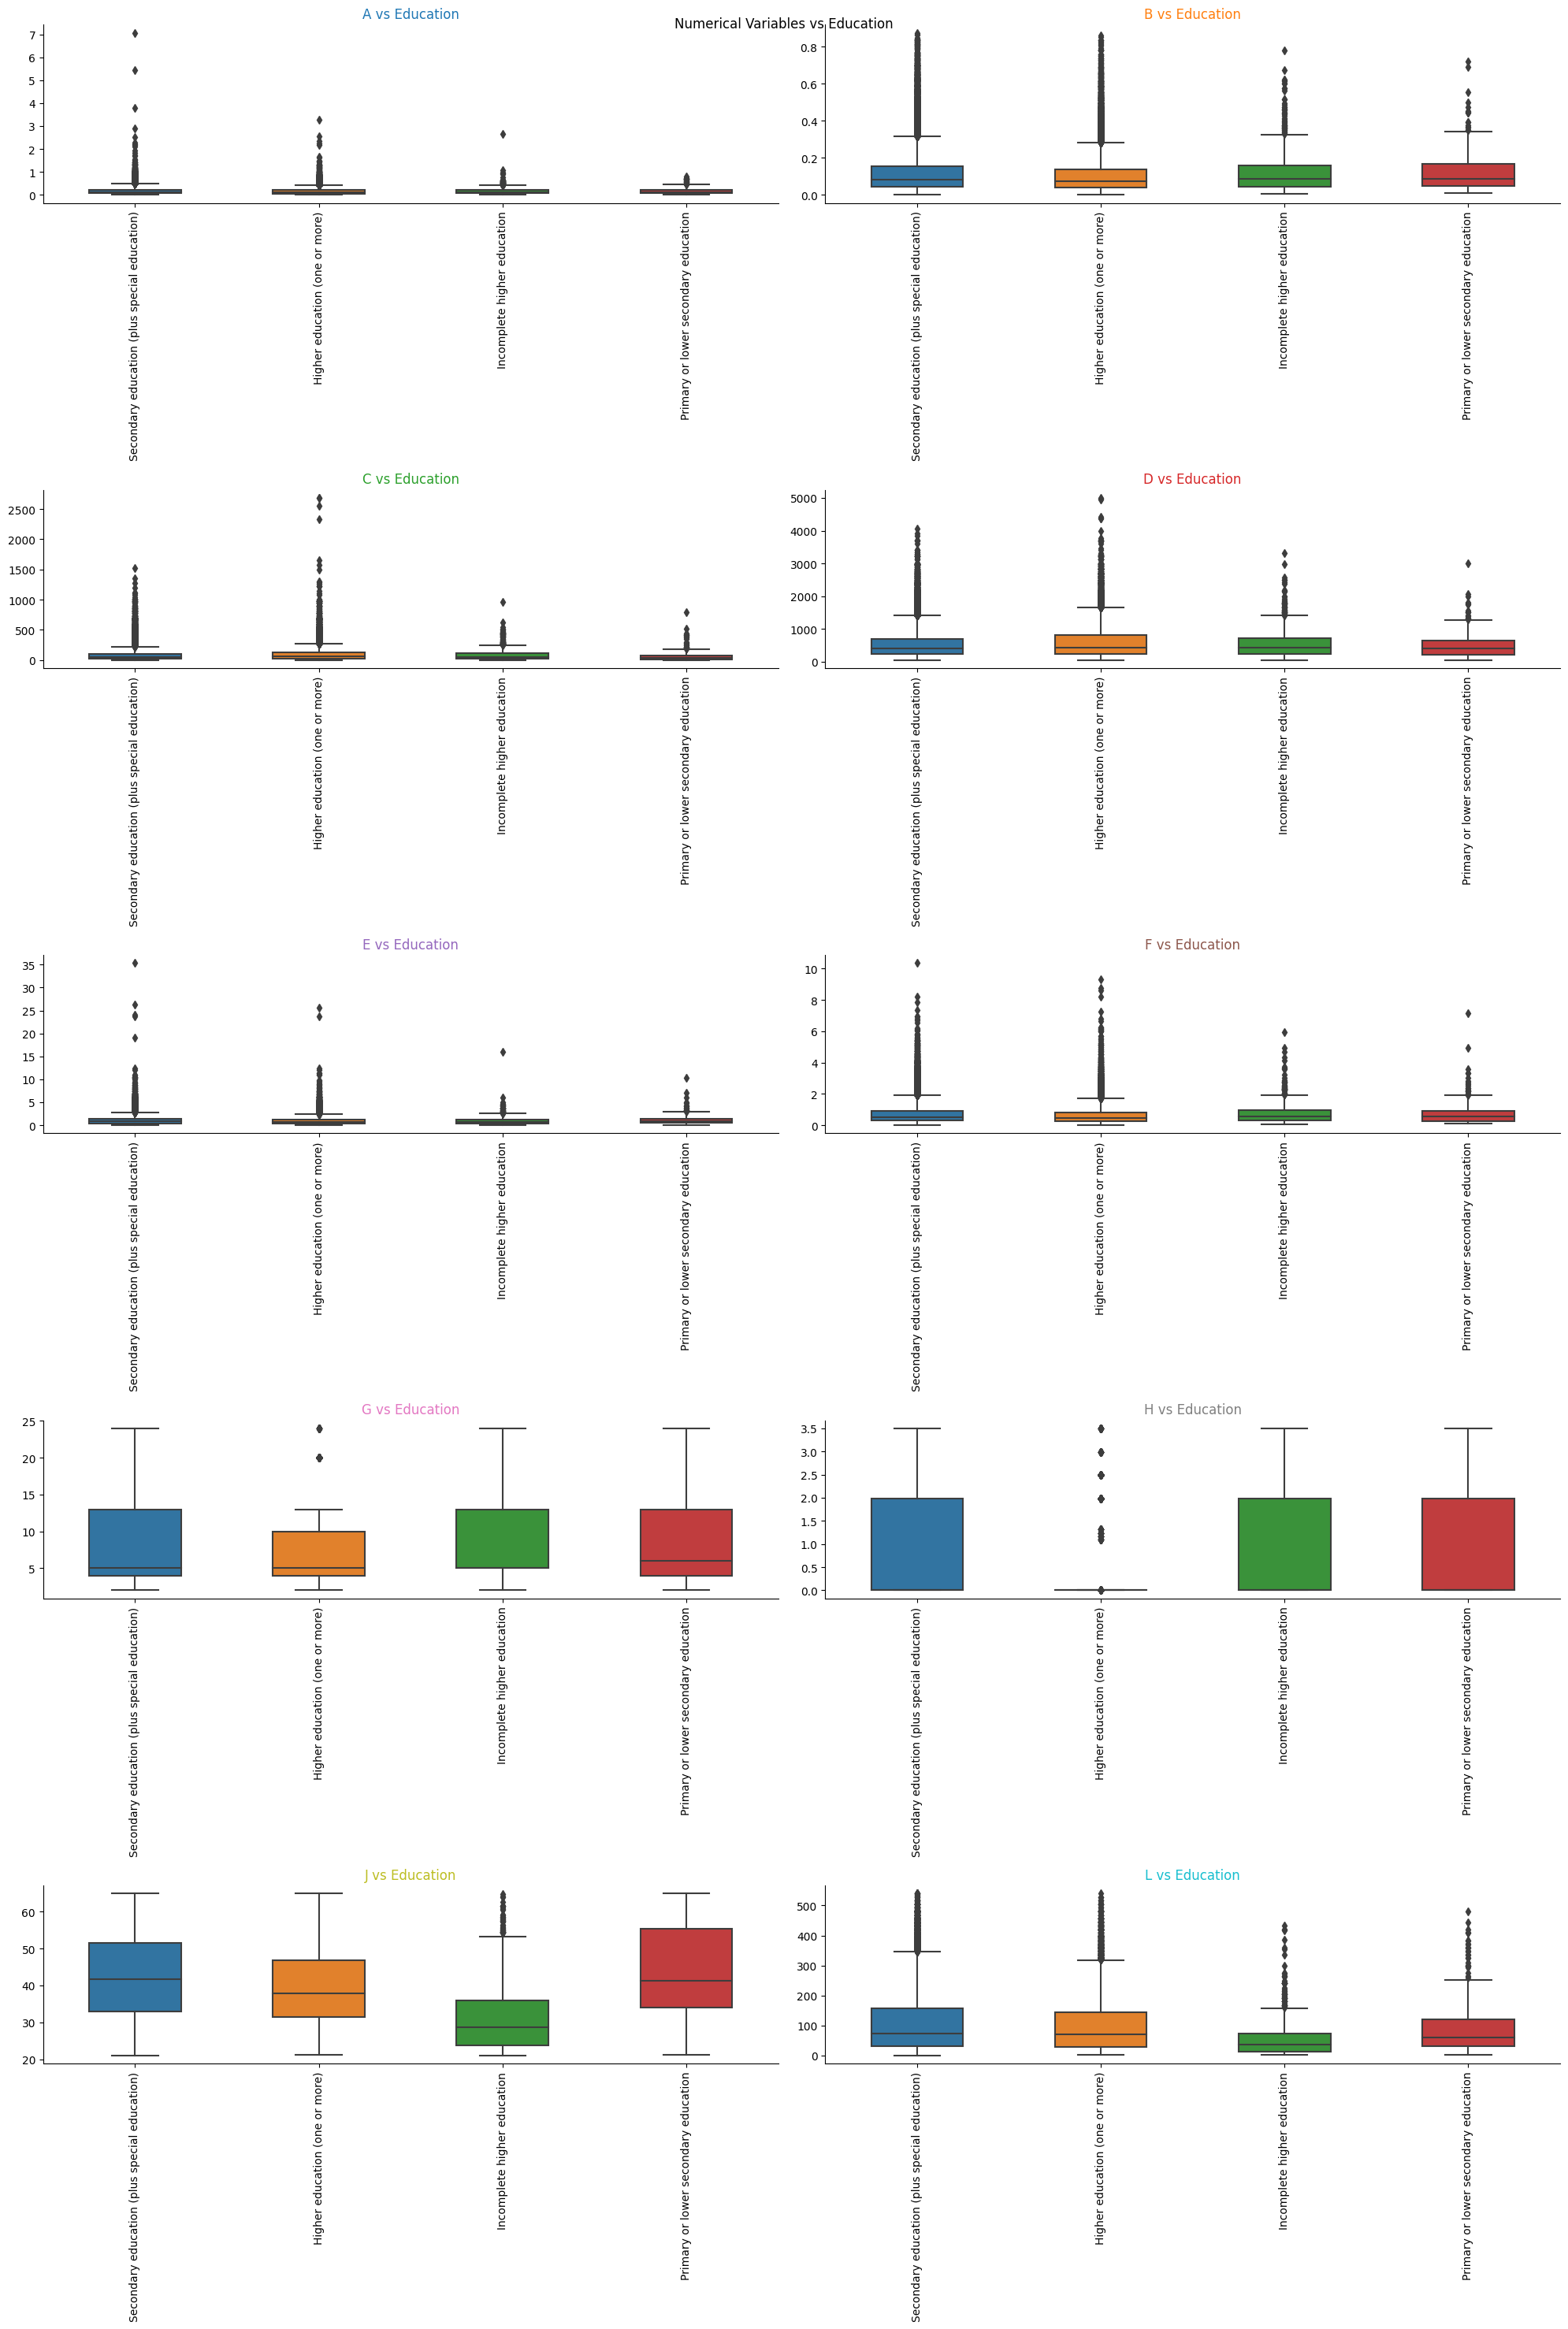

In [44]:
bivariate_num_cat_plot(data, numerical_graph, categorical_graph[3])

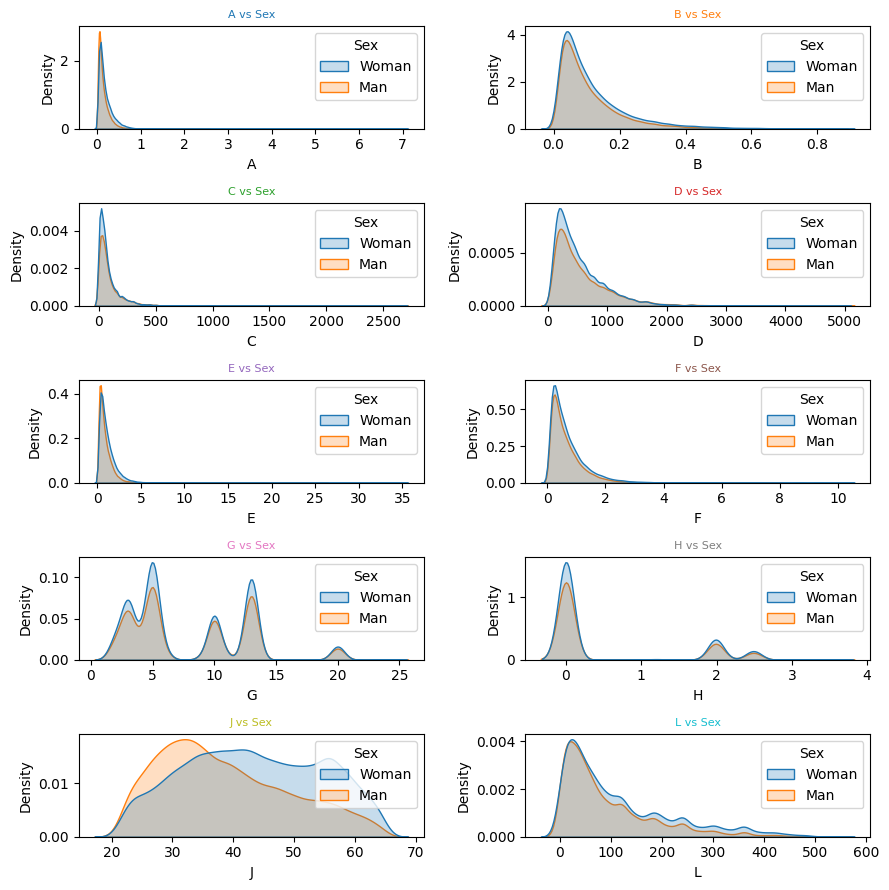

In [45]:
fig,ax = plt.subplots(5,2,figsize=(9,9))
ax = ax.flat
for i,col in enumerate(numerical_graph):
  sns.kdeplot(data, x = col, hue = categorical_graph[0], fill=True, ax = ax[i])
  ax[i].set_title(f'{col} vs {categorical_graph[0]}', fontsize=8, fontweight='regular', color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"])
fig.tight_layout()

In [46]:
def bivariate_numerical_plot(data:pd.DataFrame,
                             var_x:str,
                             var_y:str,
                             kind:str='scatter')->None:
    """
        Plots a bivariate graph for two numeric variables.

    Args:
        data (pd.DataFrame): The dataset containing the variables to be visualized.
        x (str): Column name of the variable for the x-axis.
        y (str): Column name of the variable for the y-axis.
        kind (str): Type of the plot. Options include 'scatter', 'kde', and 'hist'.

    Raises:
        KeyError: If the 'x' or 'y' column names do not exist in the DataFrame.
        ValueError: If the specified plot type is not one of the given options.
    """

    fig = sns.jointplot(data, x = var_x, y = var_y, kind = kind, height = 4, joint_kws = {'color':'#769293'},
                        marginal_kws = {'color':'#ff6666'})
    fig.ax_joint.set_xticklabels(fig.ax_joint.get_xticklabels(), color = 'black', fontsize=8)
    fig.ax_joint.set_yticklabels(fig.ax_joint.get_yticklabels(), color = 'black', fontsize=8)
    fig.ax_joint.set_xlabel(fig.ax_joint.get_xlabel(), color = '#663399', fontsize = 10, fontweight = 'regular')
    fig.ax_joint.set_ylabel(fig.ax_joint.get_ylabel(), color = '#663399', fontsize = 10, fontweight = 'regular')
    fig.fig.show()

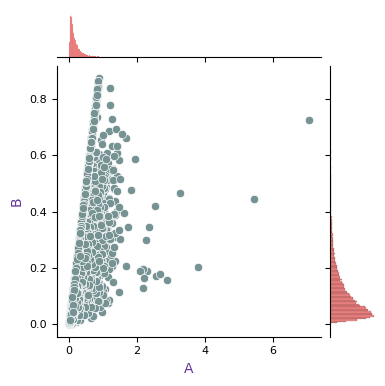

In [47]:
bivariate_numerical_plot(data, numerical_graph[0], numerical_graph[1])

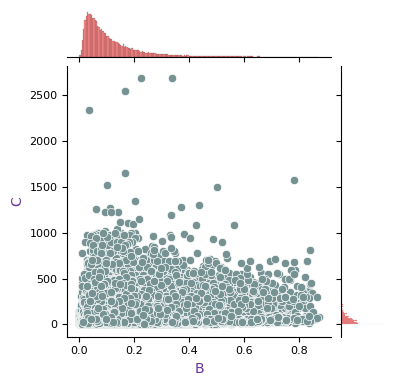

In [48]:
bivariate_numerical_plot(data, numerical_graph[1], numerical_graph[2])

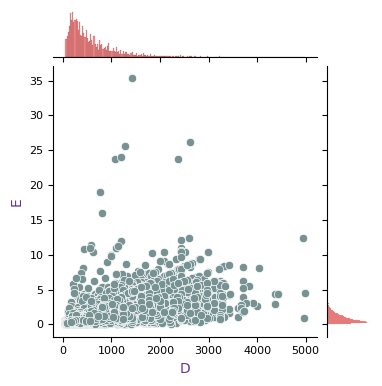

In [49]:
bivariate_numerical_plot(data, numerical_graph[3], numerical_graph[4])

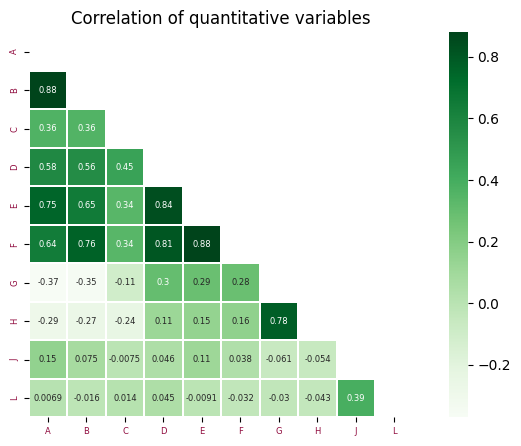

In [50]:
#Correlation graph between quantitative source variables
corr_matrix = data[numerical_graph].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig,ax = plt.subplots(figsize=(9,5))
sns.heatmap(corr_matrix,
            mask = mask,
            square = True,
            annot = True,
            ax = ax,
            linewidths = 0.2,
            annot_kws = {'size':6, 'fontweight':'regular'},
            cmap='Greens')
ax.tick_params(labelsize=6, color = 'black', labelcolor='#900C3F')
ax.set_title('Correlation of quantitative variables',fontweight='regular', color = 'black')
fig.show()

3.3 Multivariate Analysis

In [51]:
#Define a random seed
SEED = 123

In [52]:
#Factorial analysis of qualitative and quantitative variables
famd = FAMD(n_components = 2,
            n_iter = 10,
            random_state = SEED)
famd.fit(data)

FAMD(n_iter=10, random_state=123)

In [53]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,18.107,6.64%,6.64%
1,12.946,4.75%,11.40%


In [54]:
famd.column_coordinates_

component,0,1
variable,,
A,0.022901,0.050273
B,0.105188,0.000530
C,0.000047,0.000604
D,0.000262,0.000079
E,0.015520,0.037645
F,0.089285,0.002658
G,0.000837,0.001852
H,0.000099,0.002468
J,0.061814,0.310114


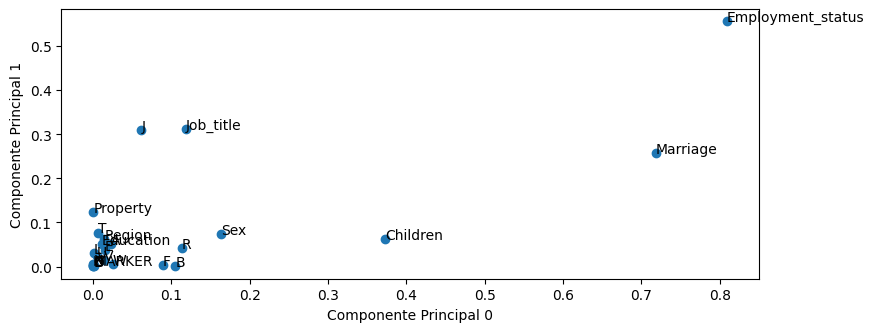

In [55]:
#Plot the coordinates of the variables in the space of principal components
plt.figure(figsize=(9,3.5))
plt.scatter(famd.column_coordinates_[0], famd.column_coordinates_[1])

for i, txt in enumerate(famd.column_coordinates_.index):
    plt.annotate(txt, (famd.column_coordinates_[0][i], famd.column_coordinates_[1][i]))

plt.xlabel('Componente Principal 0')
plt.ylabel('Componente Principal 1')

plt.show()

In [56]:
def multivariate_plot(data:pd.DataFrame,
                      var_x:str,
                      var_y:str,
                      var_cat:str)->None:

    """
      Plots a multivariate graph using two numeric variables and one categorical variable.

    Args:
      data (pd.DataFrame): The dataset containing the variables to be visualized.
      var_x (str): Column name of the numeric variable for the x-axis.
      var_yy (str): Column name of the numeric variable for the y-axis.
      var_cat (str): Column name of the categorical variable that differentiates data points.

    Raises:
      KeyError: If any of the column names do not exist in the DataFrame.
    """

    fig = sns.jointplot(data, x = var_x, y = var_y, kind = 'scatter', height = 4, joint_kws = {'color':'#769293'},
                        marginal_kws = {'color':'#ff6666'}, hue = var_cat)
    fig.ax_joint.set_xticklabels(fig.ax_joint.get_xticklabels(), color = 'black', fontsize=8)
    fig.ax_joint.set_yticklabels(fig.ax_joint.get_yticklabels(), color = 'black', fontsize=8)
    fig.ax_joint.set_xlabel(fig.ax_joint.get_xlabel(), color = '#663399', fontsize = 10, fontweight = 'regular')
    fig.ax_joint.set_ylabel(fig.ax_joint.get_ylabel(), color = '#663399', fontsize = 10, fontweight = 'regular')
    fig.fig.show()

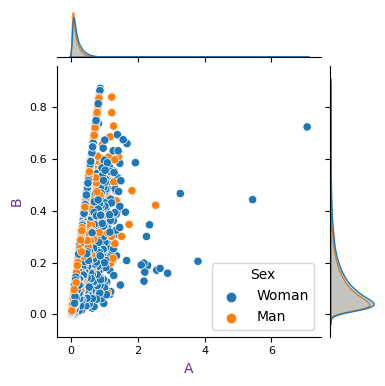

In [57]:
multivariate_plot(data, numerical_graph[0], numerical_graph[1], categorical_graph[0])

4. Preprocessing

In [58]:
#Convert our target variable to type 'float32'
data['MARKER'] = data['MARKER'].astype('float32')
data_test['MARKER'] = data_test['MARKER'].astype('float32')

In [59]:
#Divided into independent variables and dependent variable
X_train = data.drop('MARKER', axis=1)
X_test = data_test.drop('MARKER',axis = 1)
y_train = data['MARKER']
y_test = data_test['MARKER']

In [60]:
#Divided into independent variables and dependent variable
X = data.drop('MARKER',axis=1)
y = data['MARKER']

#Divided into training and test data.
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state = 123, shuffle = True, stratify = y)
print('Size of our training set:\n')
print(f'X_train ==> {X_train.shape}')
print(f'y_train ==> {y_train.shape}\n')
print('Size of our testing set:\n')
print(f'X_test ==> {X_test.shape}')
print(f'y_test ==> {y_test.shape}')

Size of our training set:

X_train ==> (71787, 24)
y_train ==> (71787,)

Size of our testing set:

X_test ==> (17947, 24)
y_test ==> (17947,)


In [61]:
#Visualize the distribution of the target variable in training and testing
count_class_train = y_train.value_counts().to_frame().reset_index().rename(columns={'index':'class', 'MARKER':'cantidad'})
count_class_test = y_test.value_counts().to_frame().reset_index().rename(columns={'index':'class', 'MARKER':'cantidad'})

def func(pct, allvalues):
   
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

print('=='*24)
print('Distribution of variable in Train')
print('=='*24)
print(count_class_train,'\n')
print('=='*24)
print('Distribution of variable in Test')
print(count_class_test,'\n')
fig.show()

Distribution of variable in Train
   cantidad  count
0       0.0  71513
1       1.0    274 

Distribution of variable in Test
   cantidad  count
0       0.0  17879
1       1.0     68 



In [62]:
#Define categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object','category']).columns.to_list()
numerical_cols = X_train.select_dtypes(include=['int','float']).columns.to_list()

In [63]:
#OneHotEncoder encoding for qualitative variables
#Standardization for quantitative variables
preprocesador = ColumnTransformer([('ohe',OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
                                    categorical_cols),
                                   ('scaler',StandardScaler(),numerical_cols)],
                                  remainder = 'passthrough',
                                  verbose_feature_names_out=False).set_output(transform='pandas')

#Fit and transform our training data
X_train_prep = preprocesador.fit_transform(X_train)

#Transform our test set
X_test_prep = preprocesador.transform(X_test)

#Show the size of our data sets
print(f'Training Set Size: {X_train_prep.shape}')
print(f'Testing Set Size: {X_test_prep.shape}')

Training Set Size: (71787, 58)
Testing Set Size: (17947, 58)


In [64]:
#Transform our data that is in 'pandas' format to type 'array'.
X_train_prep_array = X_train_prep.to_numpy(dtype = 'float32')
X_test_prep_array = X_test_prep.to_numpy(dtype = 'float32')
y_train_array = y_train.to_numpy(dtype = 'float32')
y_test_array = y_test.to_numpy(dtype = 'float32')

5. Functions for evaluating metrics

In [65]:
#Specificity score
def specificity_score(y_true:np.ndarray, y_pred:np.ndarray):
  """
  Function to calculate the specificity score

  Args:
    y_true (array-like): True labels
    y_pred (array-like): Predicted labels

  Returns:
    specificity (float): Specificity score
  """
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  specificity = tn/(tn+fp)
  return specificity

In [66]:
#Metrics
def metrics_classification (y_true:np.ndarray,
                            y_pred:np.ndarray,
                            y_probs_positive:np.ndarray) -> Dict[str,float]:
  """
  Function to calculate the following Classification Metrics

  - accuracy
  - f1_score
  - precision
  - recall
  - auc
  - specificity
  - log_loss
  - cohen_kappa
  - gini

  Args:
    y_true (array-like): True labels
    y_pred (array-like): Predicted labels
    y_probs_positive (array-like): Probabilities of the positive class

  Return:
    Metrics (dict): Classification metrics
  """
  accuracy = round(accuracy_score(y_true, y_pred),3)
  f1 = round(f1_score(y_true, y_pred),3)
  precision = round(precision_score(y_true, y_pred),3)
  recall = round(recall_score(y_true, y_pred),3)
  auc = round(roc_auc_score(y_true, y_probs_positive),3)
  specificity = round(specificity_score(y_true, y_pred),3)
  logloss = round(log_loss(y_true, y_probs_positive),3)
  cohen_kappa = round(cohen_kappa_score(y_true, y_pred),3)
  gini = round(2 * auc -1,2)

  my_metrics = {'accuracy':accuracy,
                'f1_score':f1,
                'precision':precision,
                'recall':recall,
                'specificity':specificity,
                'auc':auc,
                'log_loss':logloss,
                'cohen_kappa':cohen_kappa,
                'gini':gini}
  return my_metrics

In [67]:
#Metrics chart
def metrics_plot(metrics_train:dict, metrics_test:dict, metrics:list)->None:
    """
    Function to plot the selected metrics

    Args:
      metrics_train (dict): Metrics of the training set
      metrics_test (dict): Metrics of the testing set
      metrics (list): List of metrics to visualize

    Return:
      Plots the metrics
    """

    df_metrics = pd.DataFrame(index = metrics,
                              data = {'Train':[metrics_train[metric] for metric in metrics],
                                      'Test':[metrics_test[metric] for metric in metrics]})

    
    n = len(df_metrics.index)
    x = np.arange(n)

   
    width = 0.25

    fig,ax = plt.subplots(figsize=(6,4))
   
    rects1 = ax.bar(x-width, df_metrics.Train, width=width, label='Train',linewidth=0,edgecolor='black',color='#769293')
    
    rects2 = ax.bar(x, df_metrics.Test, width=width, label='Test',linewidth=0, edgecolor='black', color = '#ff6666')

    ax.set_title('Metrics',fontsize=12, fontweight='regular')
    ax.set_ylabel('Score',fontsize=10, fontweight='regular')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(x-0.13)
    ax.set_xticklabels(df_metrics.index, fontsize=10, fontweight='regular')
    ax.legend()

    def autolabel(rects):
    
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom', size = 7, weight = 'regular')
    
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    fig.show()

In [68]:
#Confusion Matrix
def confusion_matrix_plot (y_train:np.ndarray,
                           y_pred_train:np.ndarray,
                           y_test:np.ndarray,
                           y_pred_test:np.ndarray,
                           classes:list)->None:

    """
    Function to plot the confusion matrices for the training and test set

    Args:
      y_train(array): real value of the target variable of the training set
      y_pred_train(array): predicted value of the target variable of the training set
      y_test(array): actual value of the target variable of the test set
      y_pred_test(array): predicted value of the target variable of the test set
      classes(list): list of containing the classes of the target variable

    Return:
      Displays the confusion matrix plots
    """

    #Calculate the confusion matrices for training and testing.
    confusion_train = confusion_matrix(y_train, y_pred_train)

    confusion_test = confusion_matrix(y_test, y_pred_test)

    #Calculate the percentages
    sumatoria_train = np.sum(confusion_train, axis = 1)
    porcentajes_train = confusion_train / sumatoria_train[:,np.newaxis]*100

    sumatoria_test = np.sum(confusion_test, axis = 1)
    porcentajes_test = confusion_test / sumatoria_test[:,np.newaxis]*100

    
    etiquetas_train = [['{} \n({:.1f}%)'.format(val, porc) for val,porc in zip(row,porc_row)] for row, porc_row in zip(confusion_train, porcentajes_train)]

    etiquetas_test = [['{} \n({:.1f}%)'.format(val, porc) for val,porc in zip(row,porc_row)] for row, porc_row in zip(confusion_test, porcentajes_test)]

   
    fig,axes = plt.subplots(1,2,figsize=(9,4))
    sns.heatmap(confusion_train,
                annot = np.array(etiquetas_train),
                fmt = '',
                cmap = 'Blues',
                cbar = False,
                square = True,
                linewidths = 0.7,
                linecolor = 'white',
                ax = axes[0])
    sns.heatmap(confusion_test,
                annot = np.array(etiquetas_test),
                fmt = '',
                cmap = 'Oranges',
                cbar = False,
                square = True,
                linewidths = 0.7,
                linecolor = 'white',
                ax = axes[1])
    #Add the texts TP, FN, FP, TN to the train matrix
    axes[0].text(0.5, 0.65, 'TN', ha='center', va='center', fontsize=9, fontweight='regular')
    axes[0].text(1.5, 0.65, 'FP', ha='center', va='center', fontsize=8, fontweight='regular')
    axes[0].text(0.5, 1.65, 'FN', ha='center', va='center', fontsize=8, fontweight='regular')
    axes[0].text(1.5, 1.65, 'TP', ha='center', va='center', fontsize=8, fontweight='regular')
    axes[0].set_title('Confusion Matrix Train',fontsize=12, fontweight='regular')
    axes[0].set_xlabel('Predicted', fontsize=10, fontweight='regular')
    axes[0].set_ylabel('Real', fontsize=10, fontweight='regular')
    axes[0].set_xticklabels(classes)
    axes[0].set_yticklabels(classes)
    axes[0].tick_params(rotation=0, size = 8)

    #Add the texts TP, FN, FP, TN to the test matrix
    axes[1].text(0.5, 0.65, 'TN', ha='center', va='center', fontsize=9, fontweight='regular')
    axes[1].text(1.5, 0.65, 'FP', ha='center', va='center', fontsize=8, fontweight='regular')
    axes[1].text(0.5, 1.65, 'FN', ha='center', va='center', fontsize=8, fontweight='regular')
    axes[1].text(1.5, 1.65, 'TP', ha='center', va='center', fontsize=8, fontweight='regular')
    axes[1].set_title('Confusion Matrix Test',fontsize=12, fontweight='regular')
    axes[1].set_xlabel('Predicted', fontsize=10, fontweight='regular')
    axes[1].set_ylabel('Real', fontsize=10, fontweight='regular')
    axes[1].set_xticklabels(classes)
    axes[1].set_yticklabels(classes)
    axes[1].tick_params(rotation=0, size = 8)

    fig.subplots_adjust(top=0.9)
    fig.tight_layout()
    plt.show()

In [69]:
#Precision Recall Curve
def precision_recall_curve_plot (y_train:np.ndarray,
                                 y_probs_positive_train:np.ndarray,
                                 y_test:np.ndarray,
                                 y_probs_positive_test:np.ndarray)->None:
    """
    Function to plot Precision Recall Curve

    Args:
      y_train(array): real value of the target variable of the training set
      y_probs_positive(array): value of the positive class of the target variable of the training set
      y_test(array): real value of the target variable of the testing set
      y_probs_positive_test(array): value of the positive class of the target variable of the testing set

    Return:
      Precision Recall Curve Plot
    """

    #Calculate the precision, recall and threshold values for the training set.
    precision_train, recall_train, umbral_train = precision_recall_curve(y_train, y_probs_positive_train)
    #Calculate the average precision for the training set.
    average_precision_train = average_precision_score(y_train, y_probs_positive_train)

    #Calculate the precision, recall and threshold values for the testing set.
    precision_test, recall_test, umbral_test = precision_recall_curve(y_test, y_probs_positive_test)
    #Calculate the average precision for the testing set.
    average_precision_test = average_precision_score(y_test, y_probs_positive_test)


    fig,ax = plt.subplots(figsize=(6,3.5))
    plt.step(recall_train, precision_train, label = 'Precision Recall Curve Train', where = 'post', color = '#769293', alpha = 0.5)
    plt.step(recall_test, precision_test, label = 'Precision Recall Curve Test', where = 'post',color = '#ff6666', alpha = 0.5)

    plt.axhline(average_precision_train, color = 'red', linestyle = '--', label = f'Average Precision Train = {average_precision_train:.4f}')
    plt.axhline(average_precision_test, color = 'black', linestyle = '--', label = f'Average Precision Test = {average_precision_test:.4f}')

    plt.fill_between(recall_train, precision_train, step = 'post', alpha = 0.7, color = '#769293')
    plt.fill_between(recall_test, precision_test, step = 'post', alpha = 0.7, color = '#ff6666')

    plt.title('Precision Recall Curve', fontsize = 14, fontweight = 'regular')
    plt.xlabel('Recall', fontsize = 10, fontweight = 'regular')
    plt.ylabel('Precision', fontsize = 10, fontweight = 'regular')
    plt.xlim([0,1.005])
    plt.ylim([0,1.005])
    plt.legend()
    plt.show()

In [70]:
#ROC AUC Curve
def roc_curve_plot(y_train:np.ndarray,
                   y_probs_positive_train:np.ndarray,
                   y_test:np.ndarray,
                   y_probs_positive_test:np.ndarray)->None:
  """
  Plots a ROC curve given the false positive rate (fpr)
  and true positive rate (tpr) of a model

  Args:
      y_train(array): real value of the target variable of the training set
      y_probs_positive(array): value of the positive class of the target variable of the training set
      y_test(array): real value of the target variable of the testing set
      y_probs_positive_test(array): value of the positive class of the target variable of the testing set

  Return:
      Roc Curve Plot
  """
  fpr_train,tpr_train,thresholds_train = roc_curve(y_train, y_probs_positive_train)
  auc_train = roc_auc_score(y_train, y_probs_positive_train)

  fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_probs_positive_test)
  auc_test = roc_auc_score(y_test, y_probs_positive_test)


  fig,ax = plt.subplots(figsize=(6,3.5))
  plt.plot(fpr_train, tpr_train, color = '#769293', label = f'AUC Train = {auc_train:.4f}')
  plt.plot(fpr_test, tpr_test, color = '#ff6666', label = f'AUC Test = {auc_test:.4f}')
  plt.plot([0,1],[0,1], color = 'black', linestyle = '--')

  plt.xlabel('False Positive rate (Positive label: 1)', fontsize = 9, fontweight = 'regular')
  plt.ylabel('True Positive rate (Positive label: 1)', fontsize = 9, fontweight = 'regular')
  plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize = 12, fontweight = 'regular')
  plt.legend()
  plt.grid(linestyle = '--')
  fig.show()

In [71]:
#Classification Report
def classification_report_plot(y_train:np.ndarray,
                               y_pred_train:np.ndarray,
                               y_test:np.ndarray,
                               y_pred_test:np.ndarray)->None:
  """
  Function to plot the classification reports for the training set and the test set

  Args:
    y_train(array): real value of the target variable of the training set
    y_pred_train(array): predicted value of the target variable of the training set
    y_test(array): real value of the target variable of the testing set
    y_pred_test(array): predicted value of the target variable of the testing set

  Return:
    Clssification Report Plot
  """

  #Calculate the classification report for the training set.
  clf_report_train = classification_report(y_train, y_pred_train, output_dict = True)
  df_clf_report_train = pd.DataFrame(clf_report_train).transpose() 
  df_clf_report_train = df_clf_report_train.iloc[:2,:]

  #Calculate the classification report for the testing set.
  clf_report_test = classification_report(y_test, y_pred_test, output_dict = True)
  df_clf_report_test = pd.DataFrame(clf_report_test).transpose()
  df_clf_report_test = df_clf_report_test.iloc[:2,:]

  #Heatmap for the training set.
  fig,axes = plt.subplots(1,2,figsize=(9,5))

  #Heatmap for the training set
  sns.heatmap(df_clf_report_train,
              annot = True,
              cmap = 'Blues',
              square = True,
              linecolor = 'white',
              linewidths = 0.5,
              fmt = '.1f',
              cbar = False,
              ax = axes[0])

  axes[0].set_ylabel('Class', fontsize=10, fontweight='bold')
  axes[0].set_title('Classification Report Train', fontsize=12, fontweight='bold')
  axes[0].tick_params(rotation = 0)

  #Heatmap for the testing set
  sns.heatmap(df_clf_report_test,
              annot = True,
              cmap = 'Oranges',
              square = True,
              linecolor = 'white',
              linewidths = 0.5,
              fmt = '.1f',
              cbar = False,
              ax = axes[1])

  axes[1].set_ylabel('Class', fontsize=10, fontweight='regular')
  axes[1].set_title('Classification Report Test', fontsize=12, fontweight='regular')
  axes[1].tick_params(rotation=0)

  fig.tight_layout()
  fig.show()

In [72]:
#Class prediction error
def class_prediction_error(y_train:np.ndarray,
                           y_pred_train:np.ndarray,
                           y_test:np.ndarray,
                           y_pred_test:np.ndarray,
                           classes:list)->None:

  """
  Function to plot the number of misclassifications

  Args:
    y_train(array): real value of the target variable of the training set
    y_pred_train(array): predicted value of the target variable of the training set
    y_test(array): real value of the target variable of the testing set
    y_pred_test(array): predicted value of the target variable of the testing set
    classes(list): list of classes containing the categories of the target variable

  Return:
    Class Prediction Error
  """
  #Generate a confusion matrix for the training set.
  Y_train = confusion_matrix(y_train, y_pred_train).transpose()

  #Generate a confusion matrix for the testing set.
  Y_test = confusion_matrix(y_test, y_pred_test).transpose()

  bottom1 = np.zeros(len(classes))
  bottom2 = np.zeros(len(classes))

  fig, axes = plt.subplots(1,2,figsize=(9,4))
  for i,j in enumerate(Y_train):
    
    axes[0].bar(classes, j, bottom = bottom1)
    bottom1 += j

    
    for bar in axes[0].patches:
      axes[0].text(bar.get_x() + bar.get_width() / 2,
              bar.get_height() / 2 + bar.get_y(),
              round(bar.get_height()), ha = 'center',
              color = 'black', weight = 'regular', size = 9)
  axes[0].spines['top'].set_visible(False)
  axes[0].spines['right'].set_visible(False)
  axes[0].legend(classes, loc = 'best')
  axes[0].set_title('Train',fontsize=9,fontweight='regular',color='black')
  axes[0].set_ylabel('Count',fontsize=12, fontweight='regular')

  for w,z in enumerate(Y_test):
    
    axes[1].bar(classes, z,bottom = bottom2)
    bottom2 += z

    
    for bar in axes[1].patches:
      axes[1].text(bar.get_x() + bar.get_width() / 2,
              bar.get_height() / 2 + bar.get_y(),
              round(bar.get_height()), ha = 'center',
              color = 'black', weight = 'regular', size = 9)
  axes[1].spines['top'].set_visible(False)
  axes[1].spines['right'].set_visible(False)
  axes[1].legend(classes, loc = 'best')
  axes[1].set_title('Test',fontsize=9,fontweight='regular',color='black')
  axes[1].set_ylabel('Count',fontsize=12, fontweight='regular')

  fig.suptitle('Class Prediction Error', fontsize = 12, fontweight = 'regular', color = 'black')
  fig.subplots_adjust(top=0.9)
  fig.tight_layout()
  fig.show()

In [73]:
#Single metric plot
def single_metric_plot(metric:str,
                       names:list,
                       metrics_tr:List[dict],
                       metrics_ts:list):
  """
  Function that plots the comparison with respect to a single metric

  Args:
    metric(str): metric to compare
    names(list): model name list
    metrics_tr(list): list of training metrics
    metrics_ts(list): list of testing metrics
  """
  X = names
  Y2 = np.array([metrics_tr[0][metric],
                 metrics_tr[1][metric],
                 metrics_tr[2][metric],
                 metrics_tr[3][metric],
                 metrics_tr[4][metric],
                 metrics_tr[5][metric]])

  Y1 = np.array([metrics_ts[0][metric],
                 metrics_ts[1][metric],
                 metrics_ts[2][metric],
                 metrics_ts[3][metric],
                 metrics_ts[4][metric],
                 metrics_ts[5][metric]])

  fig,ax=plt.subplots(figsize=(6,3))
  ax.barh(X, Y1, color='#769293', edgecolor='white', label = 'Test')  
  ax.barh(X, -Y2, color='#ff6666', edgecolor='white', label = 'Train')
  ax.set_ylabel('Models',fontsize=9,fontweight='regular')
  plt.xlim([-1.5,1.5])
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.axes.xaxis.set_visible(False)
  for x, y in zip(X, Y1):
      ax.text(y + 0.18, x, '%.3f' % y, ha='center', va='top',weight='regular')

  for x, y in zip(X, Y2):
      ax.text(-y - 0.18, x, '%.3f' % y, ha='center', va='top', weight = 'regular')

  fig.legend()
  fig.suptitle(f'Performance of metric {metric.capitalize()} between models', color = 'black', fontsize = 10, fontweight = 'regular')
  fig.subplots_adjust(top = 0.9)
  fig.tight_layout()
  fig.show()

6. Model

In [74]:
#Define weights to handle class imbalance

#Calculate the amount of positive class(1) and negative class(0)
counts = y_train.value_counts().to_numpy()

#Weights to use in the XGBClassifier
scale_pos_weight = counts[0]/counts[1]

#Weight(weight) assigned to the negative(0) class
weight_for_0 = 1.0 / counts[0]

#Weight assigned to the positive class(1)
weight_for_1 = 1.0 / counts[1]

#Create a dictionary where we store the weights for both classes
class_weight = {0: weight_for_0, 1: weight_for_1}

In [75]:
#Create a dictionary containing 5 base models
#Randomized define
SEED = 42 #The Hitchhiker's Guide to the Galaxy: The number 42 is famously known as "the Answer to the Ultimate Question of Life, the Universe, and Everything"
#------------------------------------------------------------------------------------------------------------------------------
clf_1 = KNeighborsClassifier(weights = 'distance', n_jobs = -1)
clf_2 = ExtraTreesClassifier(class_weight = class_weight, n_jobs = -1,random_state=SEED)
clf_3 = LogisticRegression(class_weight = class_weight, random_state=SEED)

estimators_voting = [('knn',clf_1), ('extra_trees',clf_2),('lr',clf_3)]
#-------------------------------------------------------------------------------------------------------------------------------
clf_4 = CatBoostClassifier(learning_rate = 10e-4, class_weights = class_weight, random_state = SEED, verbose=False)
clf_5 = LGBMClassifier(learning_rate = 10e-4, class_weight = class_weight, random_state = SEED, verbosity = 0)
estimators_stack = [('cboost',clf_4), ('lgbm',clf_5)]

final_estimator_stack = XGBClassifier(learning_rate = 10e-4, scale_pos_weight = scale_pos_weight, random_state = SEED)
#-----------------------------------------------------------------------------------------------------------------------------
base_models = {'Logistic_Regression':LogisticRegression(class_weight = class_weight, random_state = SEED),
               'Random_Forest':RandomForestClassifier(class_weight = class_weight, random_state = SEED, ),
               'Votting':VotingClassifier(estimators = estimators_voting, voting = 'soft'),
               'Stacking':StackingClassifier(estimators = estimators_stack, final_estimator = final_estimator_stack, n_jobs=-1),
               'XGBoost':XGBClassifier(learning_rate = 10e-4, scale_pos_weight = scale_pos_weight, random_state = SEED)}

6.1 Training Models

In [76]:
#Store the predictions of the training set
preds_train = {}
preds_probs_train = {}

#Store the predictions of the test set
preds_test = {}
preds_probs_test = {}

#Store the trained models
models_trained = {}

for nombre,model in base_models.items():
    #Initialize the training time
    start_time = time.time()

    #Fit model
    model.fit(X_train_prep_array, y_train_array)

    #Finished the training time
    end_time = time.time()

    #Calculate the elapsed training time
    training_time = end_time - start_time

    #Show the training duration time
    print(f"{nombre} | Training time: {training_time:.2f} seconds\n")

    #Perform the prediction of each class of the training set
    preds_train[nombre] = model.predict(X_train_prep_array)
    #Make the probabilistic predictions of the positive class of the training set
    preds_probs_train[nombre] = model.predict_proba(X_train_prep_array)[:,1]

    #Perform the prediction of each class of the testing set
    preds_test[nombre] = model.predict(X_test_prep_array)
    #Make the probabilistic predictions of the positive class of the testing set
    preds_probs_test[nombre] = model.predict_proba(X_test_prep_array)[:,1]

    #Store our trained models
    models_trained[nombre] = model

Logistic_Regression | Training time: 0.27 seconds



Random_Forest | Training time: 11.34 seconds

Votting | Training time: 10.82 seconds

Stacking | Training time: 135.25 seconds

XGBoost | Training time: 11.26 seconds



In [77]:
#Name of the models we have trained
names = list(models_trained.keys())

for i,n in enumerate(names):
  print(f'names[{i}] is {n}')

names[0] is Logistic_Regression
names[1] is Random_Forest
names[2] is Votting
names[3] is Stacking
names[4] is XGBoost


6.2 Logistic Regression

In [78]:
#Metrics
metrics_train_lr = metrics_classification(y_train, preds_train[names[0]],
                                          preds_probs_train[names[0]])

metrics_test_lr = metrics_classification(y_test, preds_test[names[0]],
                                         preds_probs_test[names[0]])

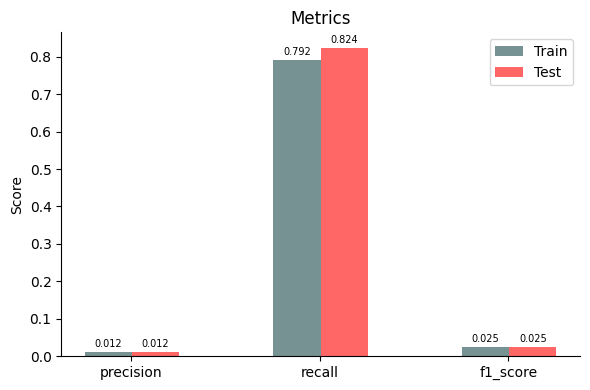

In [79]:
#Select: precision, recall y f1-score
metrics_plot(metrics_train_lr, metrics_test_lr, ['precision','recall','f1_score'])

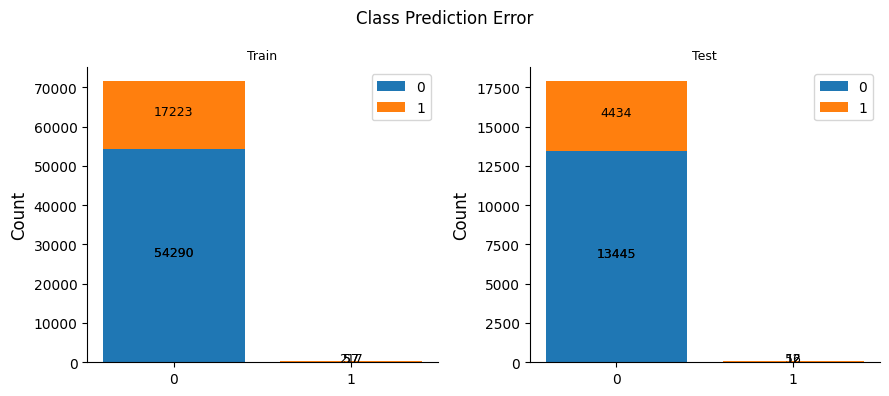

In [80]:
class_prediction_error(y_train, preds_train[names[0]],y_test, preds_test[names[0]],['0','1'])

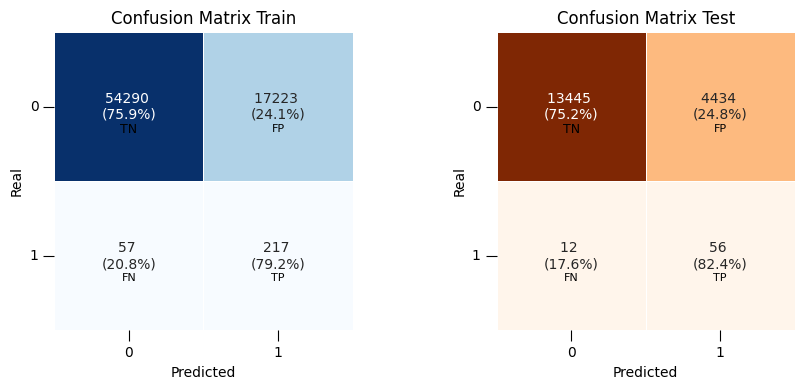

In [81]:
#Confusion Matrix
confusion_matrix_plot(y_train, preds_train[names[0]],
                      y_test, preds_test[names[0]],
                      ['0','1'])

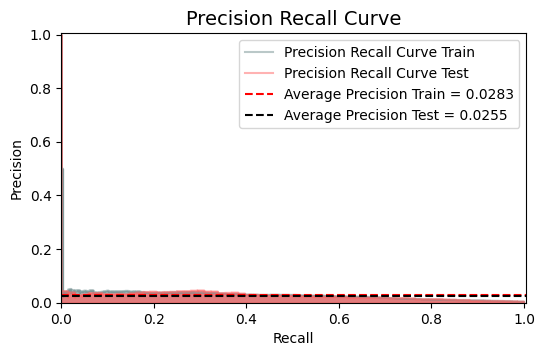

In [82]:
#Precision Recall
precision_recall_curve_plot(y_train, preds_probs_train[names[0]],
                            y_test, preds_probs_test[names[0]])

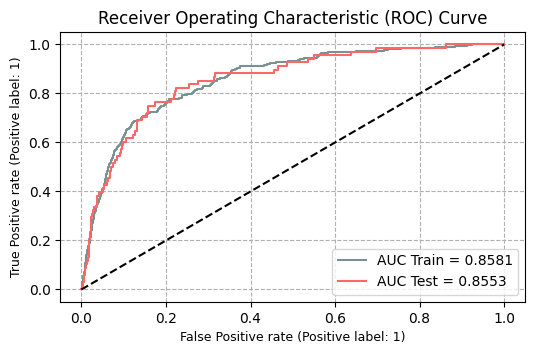

In [83]:
#ROC-AUC
roc_curve_plot(y_train, preds_probs_train[names[0]],
               y_test, preds_probs_test[names[0]])

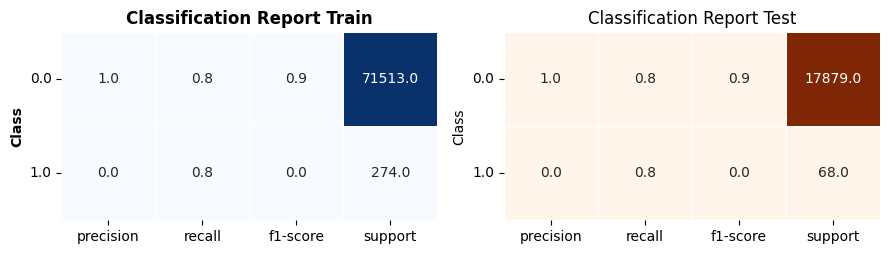

In [84]:
#Classification report
classification_report_plot(y_train, preds_train[names[0]],
                           y_test, preds_test[names[0]])

6.3 Random Forest

In [85]:
#Metrics
metrics_train_rf = metrics_classification(y_train, preds_train[names[1]],
                                          preds_probs_train[names[1]])

metrics_test_rf = metrics_classification(y_test, preds_test[names[1]],
                                         preds_probs_test[names[1]])

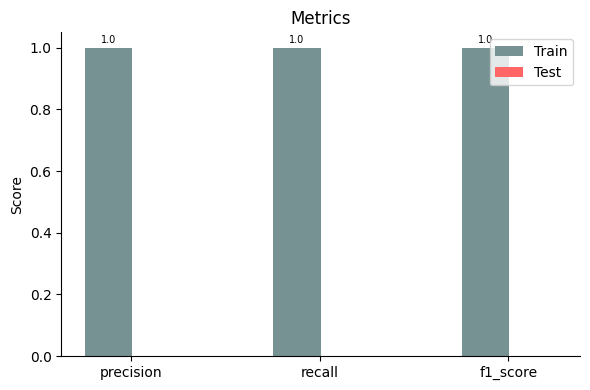

In [86]:
#Select: precision, recall y f1-score
metrics_plot(metrics_train_rf, metrics_test_rf, ['precision','recall','f1_score'])

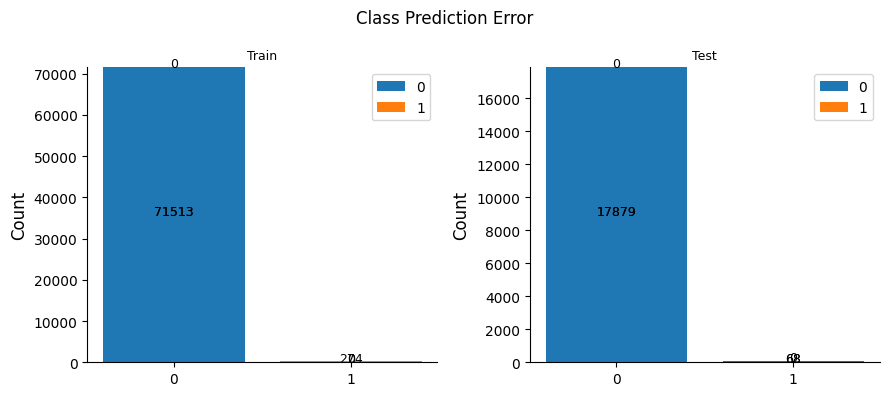

In [87]:
class_prediction_error(y_train, preds_train[names[1]],y_test, preds_test[names[1]],['0','1'])

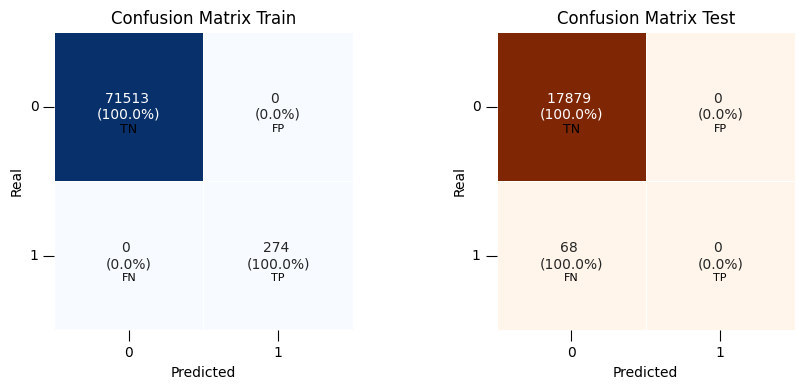

In [88]:
#Confusion Matrix
confusion_matrix_plot(y_train, preds_train[names[1]],
                      y_test, preds_test[names[1]],
                      classes = ['0','1'])

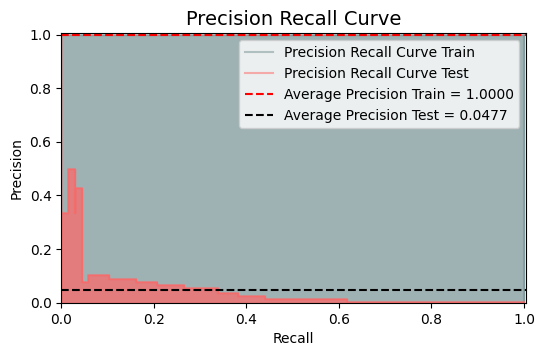

In [89]:
#Precision Recall Curve
precision_recall_curve_plot(y_train, preds_probs_train[names[1]],
                            y_test, preds_probs_test[names[1]])

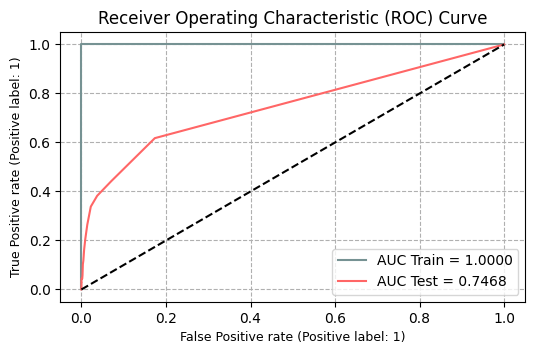

In [90]:
#ROC-AUC
roc_curve_plot(y_train, preds_probs_train[names[1]],
               y_test, preds_probs_test[names[1]])

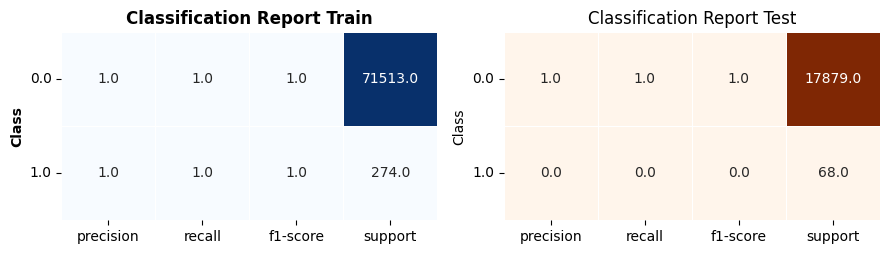

In [91]:
#Classification report
classification_report_plot(y_train, preds_train[names[1]],
                           y_test, preds_test[names[1]])

6.4 Voting

In [92]:
#Metrics
metrics_train_voting = metrics_classification(y_train, preds_train[names[2]],
                                          preds_probs_train[names[2]])

metrics_test_voting = metrics_classification(y_test, preds_test[names[2]],
                                         preds_probs_test[names[2]])

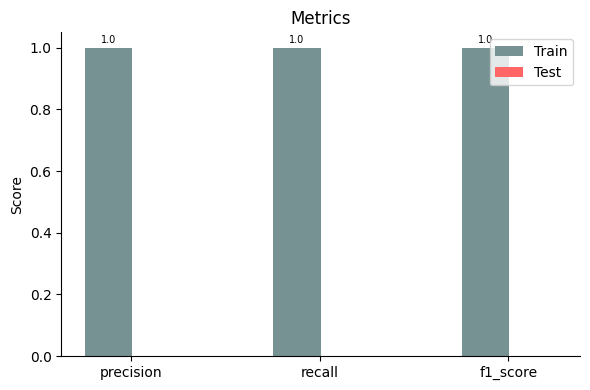

In [93]:
#Select: precision, recall y f1-scor
metrics_plot(metrics_train_voting, metrics_test_voting, ['precision','recall','f1_score'])

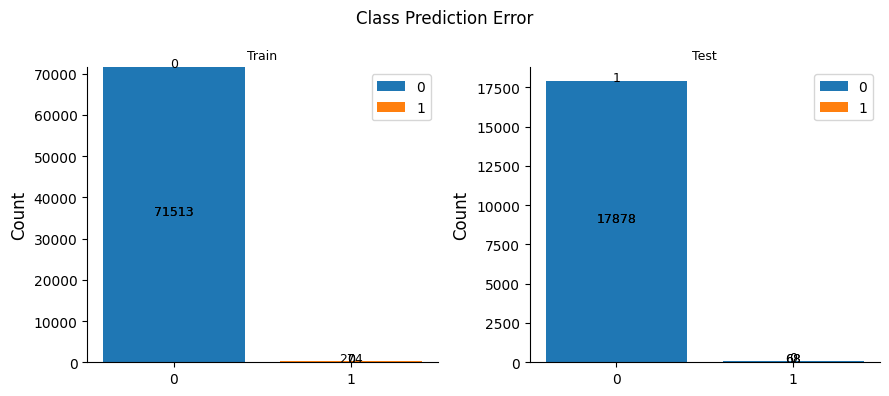

In [94]:
class_prediction_error(y_train, preds_train[names[2]],y_test, preds_test[names[2]],['0','1'])

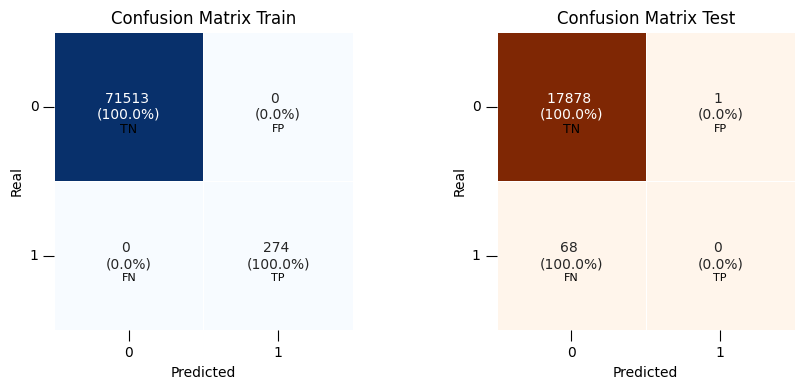

In [95]:
#Confusion Matrix
confusion_matrix_plot(y_train, preds_train[names[2]],
                      y_test, preds_test[names[2]], classes = ['0','1'])

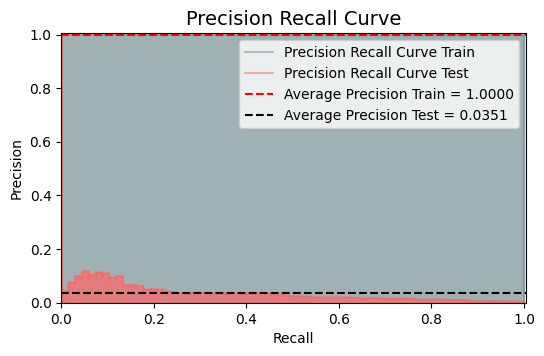

In [96]:
#Precision Recall
precision_recall_curve_plot(y_train, preds_probs_train[names[2]],
                            y_test, preds_probs_test[names[2]])

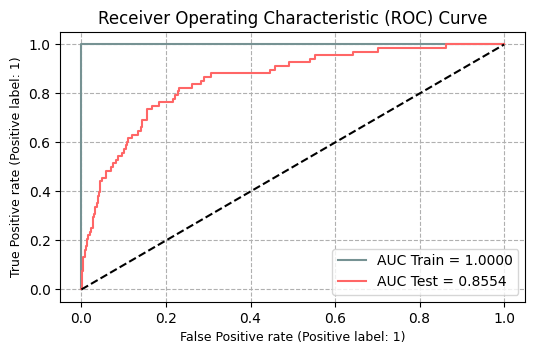

In [97]:
#ROC-AUC
roc_curve_plot(y_train, preds_probs_train[names[2]],
               y_test, preds_probs_test[names[2]])

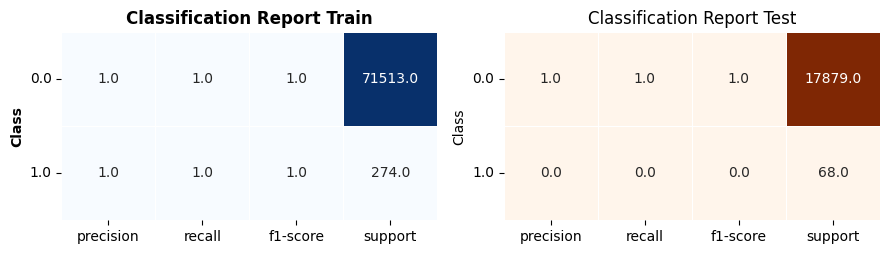

In [98]:
#Classification report
classification_report_plot(y_train, preds_train[names[2]],
                           y_test, preds_test[names[2]])

6.5 Stacking

In [99]:
#Metrics
metrics_train_stack = metrics_classification(y_train, preds_train[names[3]],
                                          preds_probs_train[names[3]])

metrics_test_stack = metrics_classification(y_test, preds_test[names[3]],
                                         preds_probs_test[names[3]])

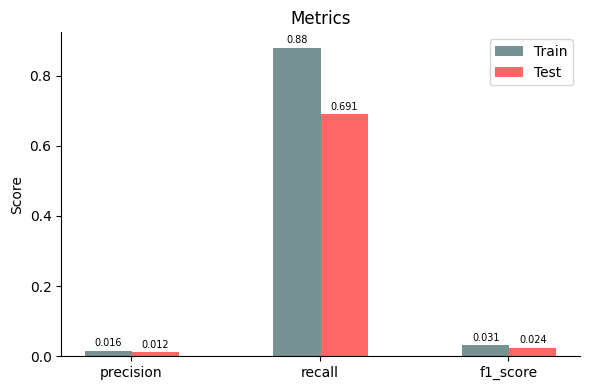

In [100]:
#Select: precision, recall y f1-score
metrics_plot(metrics_train_stack, metrics_test_stack, ['precision','recall','f1_score'])

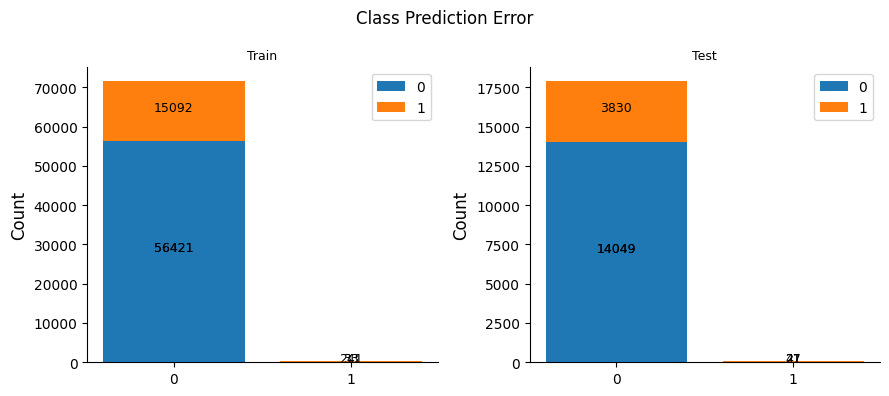

In [101]:
class_prediction_error(y_train, preds_train[names[3]],y_test, preds_test[names[3]],['0','1'])

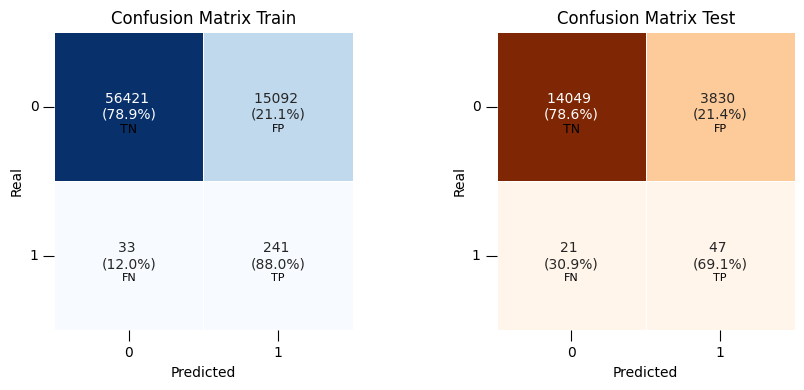

In [102]:
#Confusion Matrix
confusion_matrix_plot(y_train, preds_train[names[3]],
                      y_test, preds_test[names[3]], classes = ['0','1'])


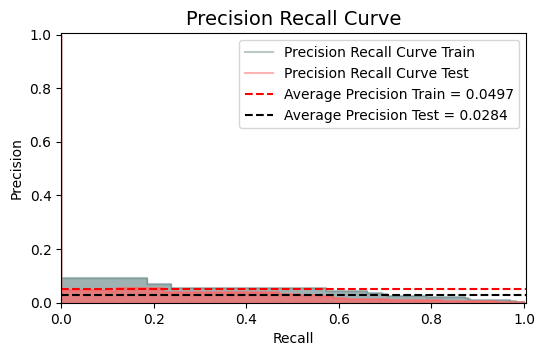

In [103]:
#Precision Recall
precision_recall_curve_plot(y_train, preds_probs_train[names[3]],
                            y_test, preds_probs_test[names[3]])

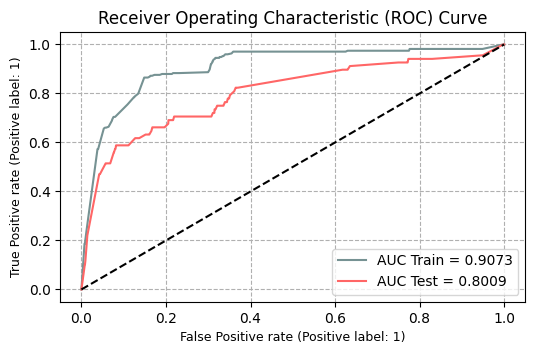

In [104]:
#ROC-AUC
roc_curve_plot(y_train, preds_probs_train[names[3]],
               y_test, preds_probs_test[names[3]])

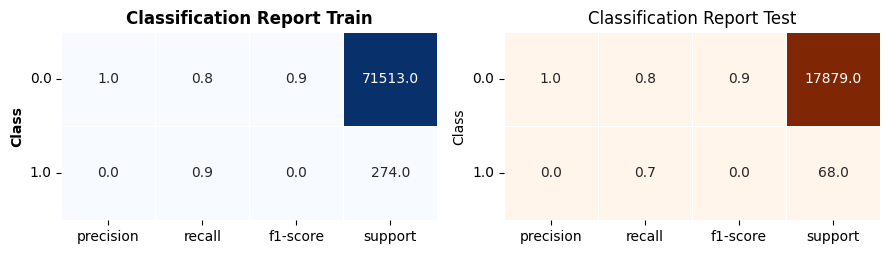

In [105]:
#Classification report
classification_report_plot(y_train, preds_train[names[3]],
                           y_test, preds_test[names[3]])

6.6 XGBoost

In [106]:
#Metrics
metrics_train_xgb = metrics_classification(y_train, preds_train[names[4]],
                                          preds_probs_train[names[4]])

metrics_test_xgb = metrics_classification(y_test, preds_test[names[4]],
                                         preds_probs_test[names[4]])

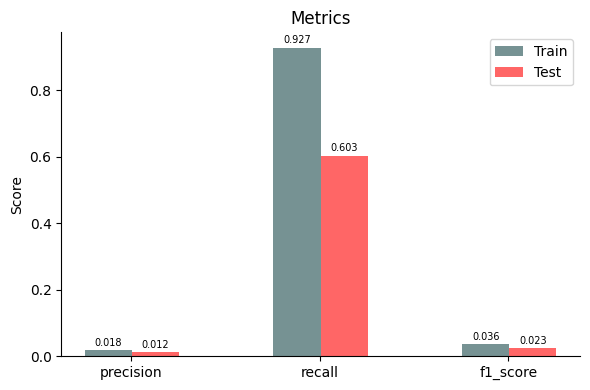

In [107]:
#Select: precision, recall y f1-score
metrics_plot(metrics_train_xgb, metrics_test_xgb, ['precision','recall','f1_score'])

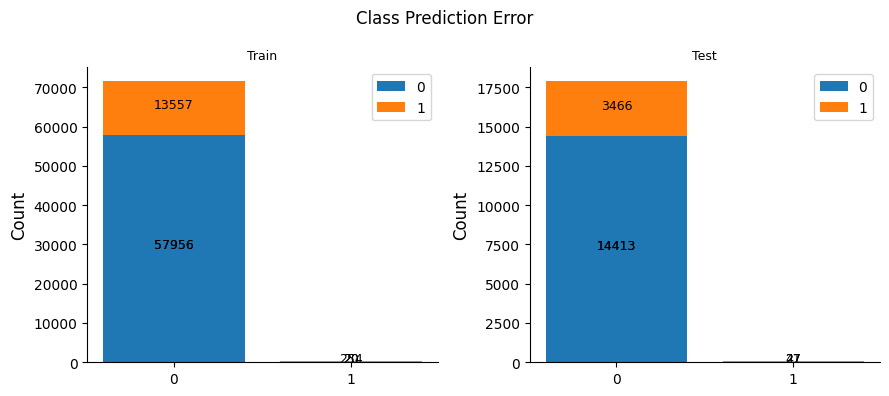

In [108]:
class_prediction_error(y_train, preds_train[names[4]],y_test, preds_test[names[4]],['0','1'])

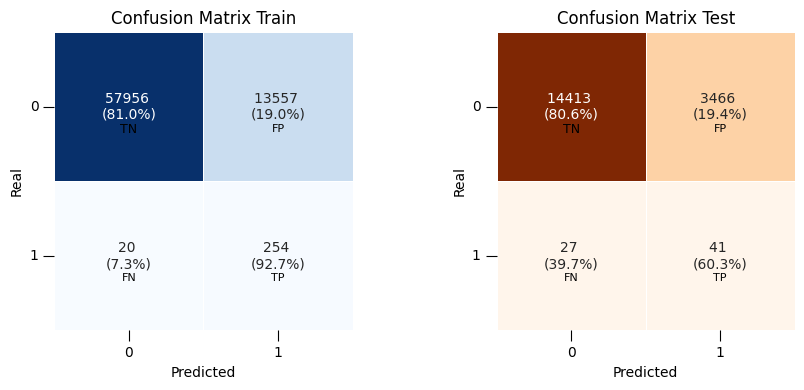

In [109]:
#Confusion Matrix
confusion_matrix_plot(y_train, preds_train[names[4]],
                      y_test, preds_test[names[4]], classes = ['0','1'])

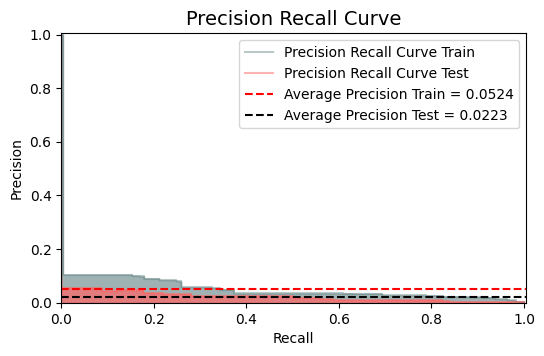

In [110]:
# Precision Recall
precision_recall_curve_plot(y_train, preds_probs_train[names[4]],
                            y_test, preds_probs_test[names[4]])

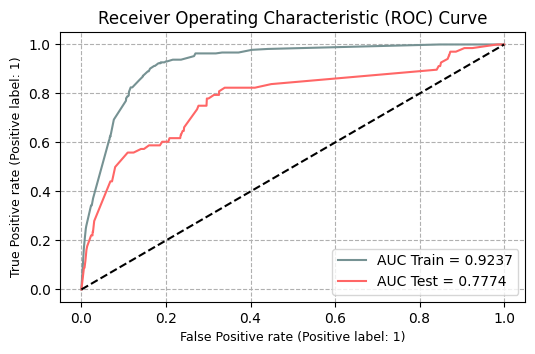

In [111]:
#ROC-AUC
roc_curve_plot(y_train, preds_probs_train[names[4]],
               y_test, preds_probs_test[names[4]])


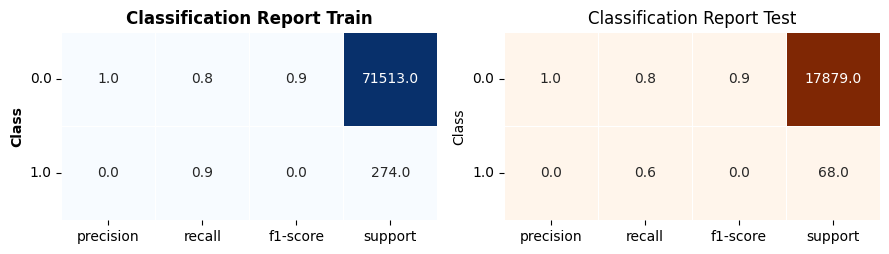

In [112]:
#Classification report
classification_report_plot(y_train, preds_train[names[4]],
                           y_test, preds_test[names[4]])

6.7 NNA(Tensorflow)

In [113]:
tf.random.set_seed(SEED)
#Input Layer
input_layer = Input(shape = (X_train_prep_array.shape[1],))

fc1 = Dense(20, activation = 'relu')(input_layer)

#Dropout layer
drop1 = Dropout(rate=0.1, seed = SEED)(fc1)

fc2 = Dense(10, activation = 'relu')(drop1)

output_layer = Dense(1, activation = 'sigmoid')(fc2)

#Define Model
model_nna = Model(input_layer, output_layer)

In [114]:
plot_model(model_nna, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [115]:
# Define metrics
metrics = [FalseNegatives(name = 'fn'),
           FalsePositives(name = 'fp'),
           TruePositives(name = 'tp'),
           TrueNegatives(name = 'tn'),
           Precision(name = 'precision'),
           Recall(name = 'recall'),
           BinaryAccuracy(name = 'accuracy', threshold = 0.5)] # 0.5 threshold for classification

# Compile
model_nna.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 10e-3, weight_decay = 0.3),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = metrics)

In [116]:
#Define Callbacks
model_checkpoint = ModelCheckpoint('best_model_nna.h5', monitor = 'val_loss', save_best_only = True)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 30, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 10)

In [117]:
#Training model
#Define batch size
BATCH_SIZE = 64

#Define epochs
EPOCHS = 200
history = model_nna.fit(X_train_prep_array,
                        y_train_array,
                        batch_size = BATCH_SIZE,
                        epochs = EPOCHS,
                        verbose = 1,
                        callbacks = [model_checkpoint, early_stopping, reduce_lr],
                        validation_data = (X_test_prep_array, y_test_array),
                        class_weight = class_weight) #class_weight very important

Epoch 1/200
1122/1122 [==============================] - 5s 3ms/step - loss: 1.6230e-05 - fn: 72.0000 - fp: 18215.0000 - tp: 202.0000 - tn: 53298.0000 - precision: 0.0110 - recall: 0.7372 - accuracy: 0.7453 - val_loss: 0.4742 - val_fn: 27.0000 - val_fp: 2015.0000 - val_tp: 41.0000 - val_tn: 15864.0000 - val_precision: 0.0199 - val_recall: 0.6029 - val_accuracy: 0.8862 - lr: 0.0100
Epoch 2/200
1122/1122 [==============================] - 3s 3ms/step - loss: 1.4887e-05 - fn: 52.0000 - fp: 20519.0000 - tp: 222.0000 - tn: 50994.0000 - precision: 0.0107 - recall: 0.8102 - accuracy: 0.7134 - val_loss: 0.8671 - val_fn: 6.0000 - val_fp: 8448.0000 - val_tp: 62.0000 - val_tn: 9431.0000 - val_precision: 0.0073 - val_recall: 0.9118 - val_accuracy: 0.5289 - lr: 0.0100
Epoch 3/200
1122/1122 [==============================] - 3s 2ms/step - loss: 1.4814e-05 - fn: 62.0000 - fp: 18945.0000 - tp: 212.0000 - tn: 52568.0000 - precision: 0.0111 - recall: 0.7737 - accuracy: 0.7352 - val_loss: 0.7237 - val_fn

In [118]:
#Order our loss and metrics to perform the plot
new_orden_train = ['loss','accuracy','recall','precision','fn','fp','tp',
                    'tn']

new_orden_val = ['val_loss', 'val_accuracy', 'val_recall', 'val_precision','val_fn',
                   'val_fp','val_tp','val_tn']

#Generate a dictionary to iterate and generate our graphs
new_dict_train = {clave:history.history[clave] for clave in new_orden_train}
new_dict_val = {clave:history.history[clave] for clave in new_orden_val}

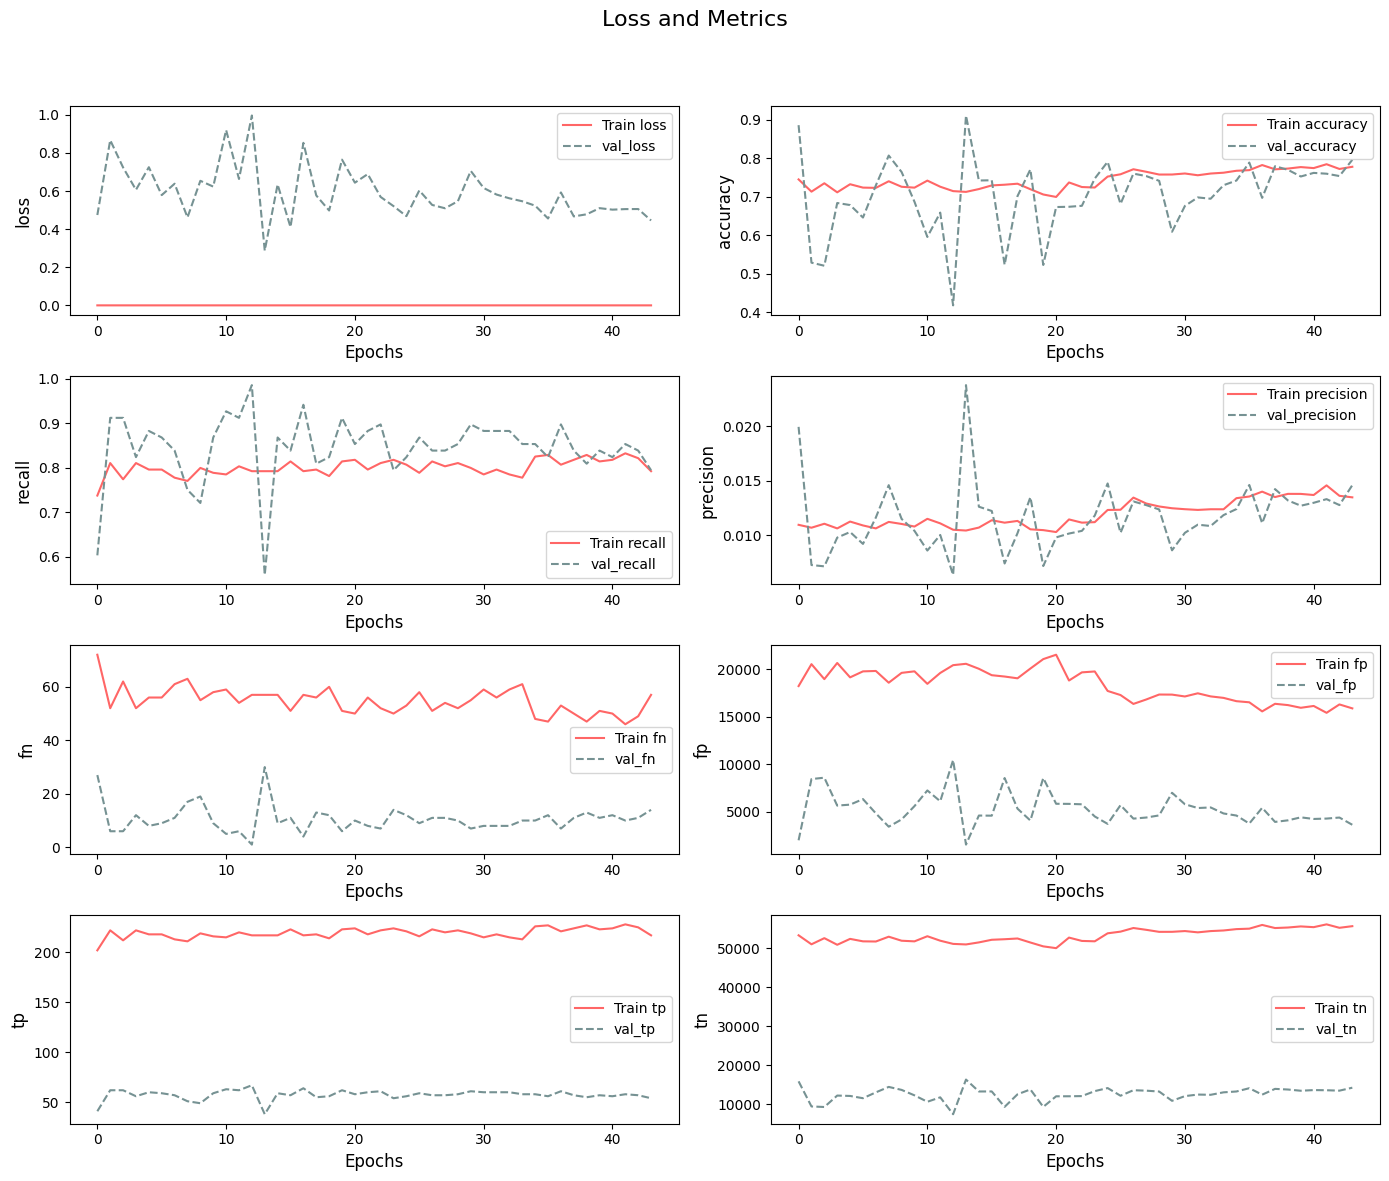

In [119]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(14,12))
ax = ax.flat
for i,(j,k) in enumerate(zip(new_dict_train.keys(), new_dict_val.keys())):
  ax[i].plot(new_dict_train[j],label = f'Train {j}',color='#ff6666')
  ax[i].plot(new_dict_val[k],'--', label = f'{k}',color='#769293')
  ax[i].set_xlabel('Epochs', fontsize = 12, fontweight = 'regular')
  ax[i].set_ylabel(f'{j}', fontsize = 12, fontweight = 'regular')
  ax[i].legend(loc='best')

fig.suptitle('Loss and Metrics',fontsize=16,fontweight='regular',color='black')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.show()

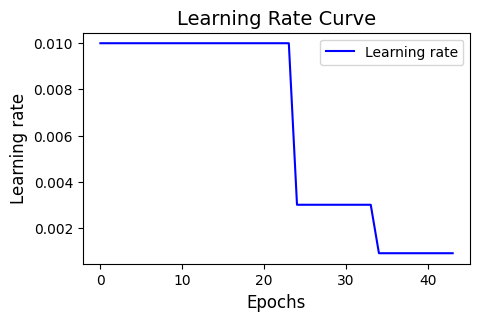

In [120]:
#Visualization of the evolution of the learning rate
fig,ax = plt.subplots(figsize = (5,3))
ax.plot(history.history['lr'], label = 'Learning rate', color = 'blue')
ax.legend(loc = 'upper right')
ax.set_title('Learning Rate Curve',fontsize=14, fontweight='regular',color='black')
ax.set_xlabel('Epochs', fontsize = 12, fontweight = 'regular')
ax.set_ylabel('Learning rate', fontsize = 12, fontweight = 'regular')
fig.show()

In [121]:
#Load the best model.
best_model_nna = load_model('best_model_nna.h5')
best_model_nna

In [122]:
#Evaluate our test suite with our loaded model
loss_and_metrics = best_model_nna.evaluate(X_test_prep_array, y_test_array)
print(f'Loss: {loss_and_metrics[0]}')
print(f'fn: {loss_and_metrics[1]}')
print(f'fp: {loss_and_metrics[2]}')
print(f'tp: {loss_and_metrics[3]}')
print(f'tn: {loss_and_metrics[4]}')
print(f'precision: {loss_and_metrics[5]}')
print(f'recall: {loss_and_metrics[6]}')
print(f'accuracy: {loss_and_metrics[7]}')

561/561 [==============================] - 3s 3ms/step - loss: 0.2874 - fn: 30.0000 - fp: 1561.0000 - tp: 38.0000 - tn: 16318.0000 - precision: 0.0238 - recall: 0.5588 - accuracy: 0.9114
Loss: 0.28738975524902344
fn: 30.0
fp: 1561.0
tp: 38.0
tn: 16318.0
precision: 0.023764852434396744
recall: 0.5588235259056091
accuracy: 0.9113500714302063


In [123]:
#Probabilistic predictions
preds_probs_train_nna = best_model_nna.predict(X_train_prep_array)
preds_probs_test_nna = best_model_nna.predict(X_test_prep_array)

561/561 [==============================] - 1s 1ms/step


In [124]:
#Class predictions
#Define the threshold to classify as 1 or 0
UMBRAL = 0.5

preds_train_nna = np.where(preds_probs_train_nna < 0.5, 0, 1).squeeze()
preds_test_nna = np.where(preds_probs_test_nna < 0.5, 0 , 1).squeeze()

In [125]:
#Metrics
metrics_train_nna = metrics_classification(y_train, preds_train_nna,
                                          preds_probs_train_nna)

metrics_test_nna = metrics_classification(y_test, preds_test_nna,
                                         preds_probs_test_nna)

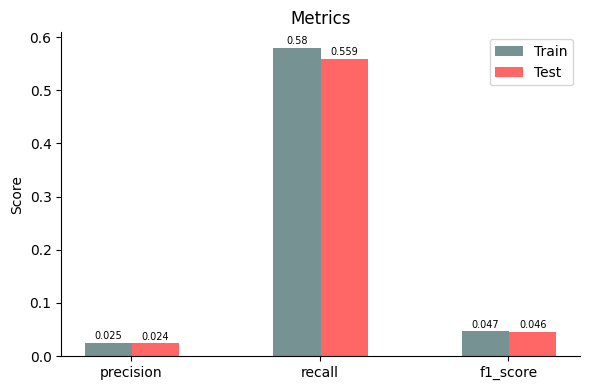

In [126]:
#Select 3 metrics to compare:
#Accuracy, precision, recall and gini
metrics_plot(metrics_train_nna, metrics_test_nna, ['precision','recall','f1_score'])

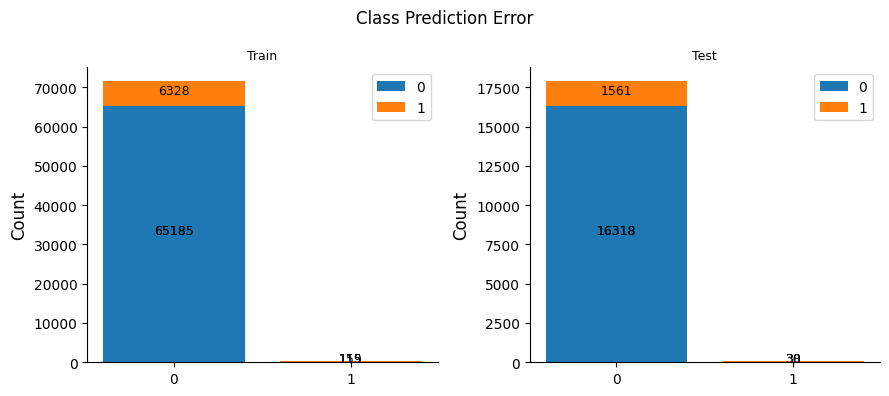

In [127]:
class_prediction_error(y_train, preds_train_nna,y_test, preds_test_nna,['0','1'])

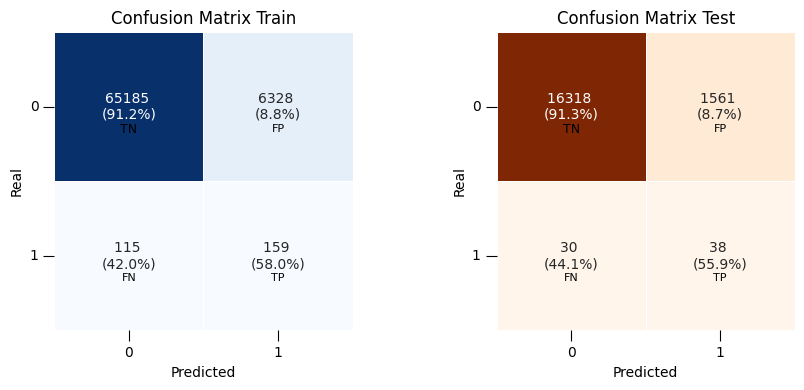

In [128]:
#Confusion Matrix
confusion_matrix_plot(y_train, preds_train_nna,
                      y_test, preds_test_nna, ['0','1'])

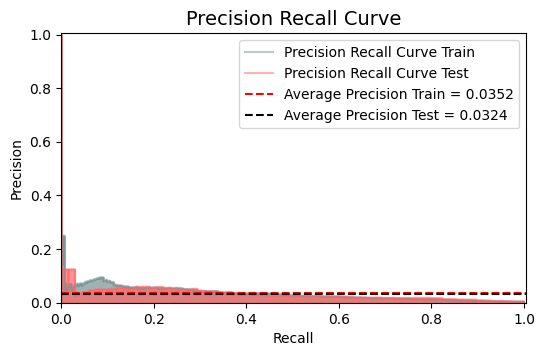

In [129]:
#Precision Recall
precision_recall_curve_plot(y_train, preds_probs_train_nna,
                            y_test, preds_probs_test_nna)

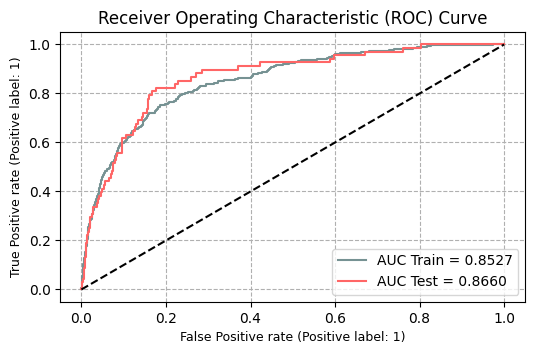

In [130]:
#ROC-AUC
roc_curve_plot(y_train, preds_probs_train_nna,
               y_test, preds_probs_test_nna)

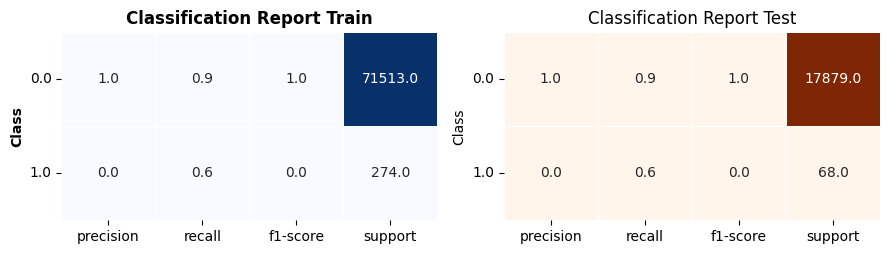

In [131]:
#Classification report
classification_report_plot(y_train, preds_train_nna,
                           y_test, preds_test_nna)

7. Compare Metrics

In [132]:
def compare_metrics(names_models:dict,
                    metrics:dict):
    '''
    Function to plot the comparison of metrics between different models

    Args:
      names_models (dict): Dictionary with model names as keys and their corresponding metric values as values
      metrics (list): List of metrics to compare

    Returns:
      Displays a plot comparing the metrics across the provided models
    '''
    #Convert dictionaries from names models to dataframe
    df_metrics = pd.DataFrame.from_dict(names_models,orient='index').T
    df_metrics = df_metrics.loc[metrics,:]


    n = len(df_metrics.index)
    x = np.arange(n)

    width = 0.1

    fig,ax = plt.subplots(figsize=(10,4))

    rects1 = ax.bar(x-width, df_metrics.iloc[:,0], width=width, label=df_metrics.columns[0], linewidth=0,edgecolor='black',color='#ffa500')

    rects2 = ax.bar(x, df_metrics.iloc[:,1], width=width, label=df_metrics.columns[1], linewidth=0, edgecolor='black', color = '#c39797')
 
    rects3 = ax.bar(x+(width)*1.0, df_metrics.iloc[:,2], width=width, label=df_metrics.columns[2], linewidth=0, edgecolor='black', color = '#fff68f')
  
    rects4 = ax.bar(x+(width)*2.0, df_metrics.iloc[:,3], width=width, label=df_metrics.columns[3], linewidth=0, edgecolor='black', color = '#66cdaa')
    
    rects5 = ax.bar(x+(width)*3.0, df_metrics.iloc[:,4], width=width, label=df_metrics.columns[4], linewidth=0, edgecolor='black', color = '#ff6666')
    
    rects6 = ax.bar(x+(width)*4.0, df_metrics.iloc[:,5], width=width, label=df_metrics.columns[5], linewidth=0, edgecolor='black', color = '#cbbeb5')


    ax.set_title('Metrics',fontsize=12, fontweight='regular')
    ax.set_ylabel('Score',fontsize=10, fontweight='regular')
    ax.set_xticks(x+0.1)
    ax.set_xticklabels(df_metrics.index, fontsize=10, fontweight='regular')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc='best')

    def autolabel(rects):
    
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom', size = 7, weight = 'regular')
    
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    autolabel(rects5)
    autolabel(rects6)
    fig.tight_layout()
    fig.show()

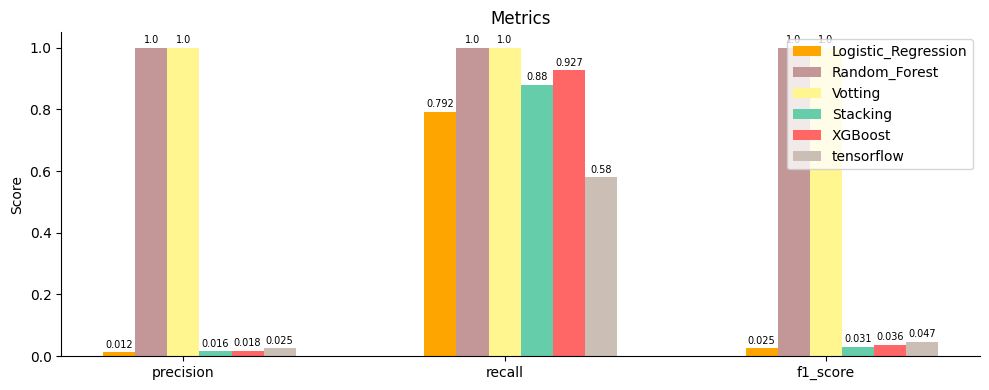

In [133]:
#Training set metrics
metrics_models = {names[0]:metrics_train_lr,
                  names[1]:metrics_train_rf,
                  names[2]:metrics_train_voting,
                  names[3]:metrics_train_stack,
                  names[4]:metrics_train_xgb,
                  'tensorflow':metrics_train_nna}

compare_metrics(names_models = metrics_models,
                    metrics = ['precision','recall','f1_score'])

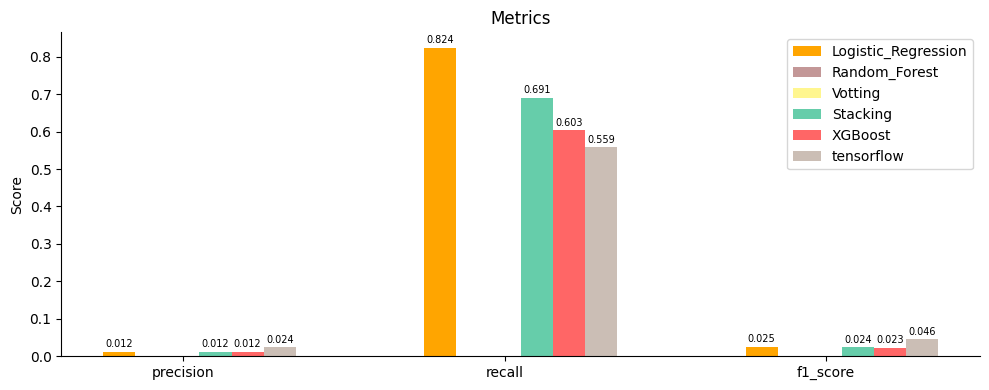

In [134]:
#Testing set metrics
metrics_models = {names[0]:metrics_test_lr,
                  names[1]:metrics_test_rf,
                  names[2]:metrics_test_voting,
                  names[3]:metrics_test_stack,
                  names[4]:metrics_test_xgb,
                  'tensorflow':metrics_test_nna}

compare_metrics(names_models = metrics_models,
                    metrics = ['precision','recall','f1_score'])

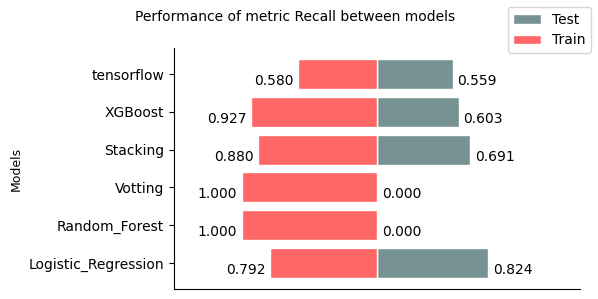

In [135]:
single_metric_plot(metric = 'recall',
                   names = [names[0], names[1], names[2], names[3], names[4], 'tensorflow'],
                   metrics_tr = [metrics_train_lr, metrics_train_rf, metrics_train_voting, metrics_train_stack,metrics_train_xgb, metrics_train_nna],
                   metrics_ts = [metrics_test_lr, metrics_test_rf, metrics_test_voting, metrics_test_stack,metrics_test_xgb, metrics_test_nna])

Performance Ranking:
1.Logistic Regression
2.Stacking
3.XGBoost
4.Tensorflow
5.Voting
6.Random Forest